# 进阶 第一讲：遗传规划特征工程 gplearn

**科大财经**

参考文献
1. gplearn 官方文档 https://gplearn.readthedocs.io/en/stable/_modules/index.html
2. B站视频 https://www.bilibili.com/video/BV1X24y1a7Ai/?spm_id_from=333.999.0.0&vd_source=8dc21c78fda83add8f17bbf5c23e3877
3. Graphviz安装配置教程 https://blog.csdn.net/qq_42257666/article/details/121688656


参数介绍
|参数|解释|
|-|-|
|population_size|整数，可选(默认值=1000)种群规模(每一代个体数目即初始树的个数)。|
|generations|整数，可选(默认值=20)要进化的代数。|
|tournament_size|整数，可选(默认值=20)进化到下一代的个体数目(从每一代的所有公式中，tournament_size个公式会被随机选中，其中适应度最高的公式将被认定为生存竞争的胜利者，进入下一代。tournament_size的大小与进化论中的选择压力息息相关：tournament_size越小，选择压力越大，算法收敛的速度可能更快，但也有可能错过一些隐藏的优秀公式)。|
|stopping_criteria|浮点数，可选(默认值=0.0)停止条件。|
|const_range|两个浮点数组成的元组，或none，可选(默认值=(-1，1))公式中所要包含的常量取值范围。如果设为none，则无常数。|
|init_depth|两个整数组成的元组，可选(默认值=(2，6))用来表示原始公式初始总体的树深度范围，树的初始深度将处在(min_depth, max_depth)的区间内(包含端点)。原始公式初始总体的树深度范围，单个树将随机选择此范围内的最大深度。|
|init_method|字符串, 可选(默认值=‘half and half’)控制每棵公式树的初始化方式，有三种策略：|
|grow|公式树从根节点开始生长。在每一个子节点，gplearn会从所有常数、变量和函数中随机选取一个元素。如果它是常数或者变量，那么这个节点会停止生长，成为一个叶节点。如果它是函数，那么它的两个子节点将继续生长。用grow策略生长得到的公式树往往不对称，而且普遍会比用户设置的最大深度浅一些；在变量的数量远大于函数的数量时，这种情况更明显。|
|full|除了最后一层外，其他所有层的所有节点都是内部节点——它们都只是随机选择的函数，而不是变量或者常数。最后一层的叶节点则是随机选择的变量和常数。用full策略得到的公式树必然是perfect binary tree。|
|half and half|一半的公式树用grow策略生成，另一半用full策略生成。因为种群的多样性有利于生存，所以这是init_method参数的默认值。|
|function_set|字符串, 用于符号回归的函数，包括gplearn原始提供以及自定义|
|metric|字符串, 目标函数(损失函数) (默认值=‘MAE’(平均绝对误差))，此外还包括gplearn提供的mse等，也可以自定义。|
|parsimony_coefficient|浮点数或 “auto”, 可选 (默认值=0.001)用于惩罚过于复杂的公式。简约系数往往由实践验证决定。如果过于吝啬（简约系数太大），那么所有的公式树都会缩小到只剩一个变量或常数；如果过于慷慨（简约系数太小），公式树将严重膨胀。不过，gplearn已经提供了’auto’的选项，能自动控制节俭项的大小|
|p_crossover|浮点数, 可选 (默认值=0.9)对胜者进行交叉的概率，用于合成新的树|
|p_subtree_mutation|浮点数, 可选 (默认值=0.01)控制胜者中进行子树变异的比例(优胜者的一棵子树将被另一棵完全随机的全新子树代替)所选值表示进行子树突变的部分。|
|p_hoist_mutation|浮点数, 可选 (默认值=0.01) 控制进行hoist变异的比例，hoist变异是一种对抗公式树膨胀（bloating，即过于复杂）的方法：从优胜者公式树内随机选择一个子树A，再从|A里随机选择一个子树B，然后把B提升到A原来的位置，用B替代A。hoist的含义即「升高、提起」。
|p_point_mutation|浮点数, 可选 (默认值=0.01)控制点进行突变的比例|
|p_point_replace|浮点数, 可选 (默认值=0.05)对于点突变时控制某些点突变的概率。|
|max_samples|浮点数, 可选 (默认值=1.0)从样本中抽取的用于评估每个树(成员)的百分比|
|feature_names|list(列表), 可选 (默认值=None)因子名(或特征名)若为none则用x0，x1等表示。|
|warm_start|布尔型, 可选 (默认值=False)用于选择是否使用之前的解决方案|
|low_memory|布尔型, 可选 (默认值=False)用于选择是否只保留当前一代|
|n_jobs|整数，可选(默认值=1)用于设置并行计算的操作|
|verbose|整数，可选(默认值=0)类似TensorFlow，keras中的verbose,verbose：日志显示;verbose = 0 为不在标准输出流输出日志信息;verbose = 1 为输出进度条记录;verbose = 2 为每个epoch输出一行记录|
|random_state|整数, RandomState实例 或者 None, 可选(默认值=None)如果是int，则random_state是随机数生成器使用的种子；如果是random state实例，则random_state是随机数生成器；如果没有，则随机数生成器是使用的RandomState实例按“np.random”。|

In [1]:
# 脚本 
from factor_analysis_adv import *

# gplearn
from gplearn import genetic
from gplearn.functions import make_function
from gplearn.genetic import SymbolicTransformer, SymbolicRegressor
from gplearn.fitness import make_fitness

## 1 基础设置

### 1.1 时间设置

In [2]:
train_start_date = '2022-01-01'
train_end_date = '2023-01-01'
index_item = '000852.XSHG'

### 1.2 算子构建

In [3]:
# 支持的算子列表
base_function = ['add', 'sub', 'mul', 'div','abs','neg']

window = 10

def _delta(data):
    value = np.diff(data.flatten())
    value = np.append(0, value)

    return value

def _sma(data):
    window=10
    value = np.array(pd.Series(data.flatten()).rolling(window).mean().tolist())
    value = np.nan_to_num(value)
    
    return value

def _stddev(data):
    window=10
    value = np.array(pd.Series(data.flatten()).rolling(window).std().tolist())
    value = np.nan_to_num(value)
    return value

stddev = make_function(function=_stddev, name='stddev', arity=1)
delta = make_function(function=_delta, name='delta', arity=1)
sma = make_function(function=_sma, name='sma', arity=1)

user_function = [stddev,delta,sma]

function_set = base_function + user_function

## 2 特征处理

In [4]:
gp_data_train = pd.read_pickle('./data/gp_data.pkl').loc[train_start_date:train_end_date].swaplevel().sort_index()        # 确保index标的在前，日期在后
gp_data_train.head()

volume      high  prev_close  total_turnover  \
order_book_id datetime                                                     
000006.XSHE   2022-01-04 -0.717291  0.032018    0.071173       -0.317354   
              2022-01-05 -0.887327  0.039428    0.079298       -0.339130   
              2022-01-06 -0.881382  0.046444    0.098943       -0.396032   
              2022-01-07 -0.883338  0.041007    0.088124       -0.521078   
              2022-01-10 -0.824211  0.042026    0.093682       -0.511008   

                             close  num_trades      open       low  \
order_book_id datetime                                               
000006.XSHE   2022-01-04  0.042670   -0.637537  0.032535  0.038855   
              2022-01-05  0.046849   -0.729763  0.032308  0.046718   
              2022-01-06  0.043251   -0.777576  0.055926  0.056824   
              2022-01-07  0.043379   -0.844058  0.041094  0.051276   
              2022-01-10  0.041143   -0.845384  0.050695  0.048227   

                          turnover_ratio     ret_1  excess_return  
order_book_id datetime                                             
000006.XSHE   2022-01-04       -0.655413 -0.004438       0.016510  
              2022-01-05       -0.689353  0.011111      -0.002228  
              2022-01-06       -0.842483 -0.006579       0.010960  
              2022-01-07       -0.906569  0.013269       0.003017  
              2022-01-10       -0.804209  0.000000       0.004945

In [5]:
gp_factor_train = gp_data_train.drop(['ret_1','excess_return'],axis = 1)
base_Factor = gp_factor_train.columns.tolist()
gp_factor_train.head()

volume      high  prev_close  total_turnover  \
order_book_id datetime                                                     
000006.XSHE   2022-01-04 -0.717291  0.032018    0.071173       -0.317354   
              2022-01-05 -0.887327  0.039428    0.079298       -0.339130   
              2022-01-06 -0.881382  0.046444    0.098943       -0.396032   
              2022-01-07 -0.883338  0.041007    0.088124       -0.521078   
              2022-01-10 -0.824211  0.042026    0.093682       -0.511008   

                             close  num_trades      open       low  \
order_book_id datetime                                               
000006.XSHE   2022-01-04  0.042670   -0.637537  0.032535  0.038855   
              2022-01-05  0.046849   -0.729763  0.032308  0.046718   
              2022-01-06  0.043251   -0.777576  0.055926  0.056824   
              2022-01-07  0.043379   -0.844058  0.041094  0.051276   
              2022-01-10  0.041143   -0.845384  0.050695  0.048227   

                          turnover_ratio  
order_book_id datetime                    
000006.XSHE   2022-01-04       -0.655413  
              2022-01-05       -0.689353  
              2022-01-06       -0.842483  
              2022-01-07       -0.906569  
              2022-01-10       -0.804209

`防止不同标的间数据粘连 : 为适配不同的适应度目标函数对于特征集和目标集的修正`

In [6]:
stock_list = gp_data_train.index.get_level_values(0).tolist()

# 间隔日位置
del_index = []
for i in range(1,len(stock_list)):
    if stock_list[i - 1] != stock_list[i]:
        del_index.append(i)

In [7]:
print(del_index)

[239, 481, 722, 964, 1203, 1218, 1460, 1701, 1942, 2183, 2425, 2667, 2909, 3151, 3393, 3635, 3869, 4096, 4327, 4466, 4682, 4924, 5063, 5305, 5547, 5562, 5804, 6046, 6288, 6295, 6533, 6548, 6789, 7031, 7134, 7371, 7612, 7854, 8095, 8336, 8578, 8820, 9060, 9287, 9514, 9754, 9994, 10222, 10464, 10706, 10948, 11190, 11415, 11657, 11899, 12141, 12244, 12486, 12728, 12866, 13108, 13335, 13350, 13592, 13607, 13834, 14076, 14317, 14332, 14574, 14816, 14831, 14970, 15212, 15454, 15696, 15938, 16180, 16283, 16525, 16599, 16697, 16939, 17179, 17421, 17661, 17903, 18145, 18386, 18627, 18730, 18972, 19213, 19454, 19696, 19934, 20037, 20279, 20517, 20620, 20862, 21104, 21346, 21588, 21828, 22070, 22312, 22538, 22780, 23022, 23262, 23504, 23731, 23962, 24204, 24430, 24671, 24913, 25154, 25396, 25638, 25880, 26122, 26261, 26503, 26569, 26811, 26826, 26841, 26856, 26871, 27113, 27355, 27597, 27673, 27915, 28142, 28383, 28610, 28852, 28991, 29233, 29475, 29716, 29855, 29870, 30112, 30354, 30596, 30838, 

## 模型训练一

### 适应度函数构建【十分组单调性】

模型已经包含自适应的spearman检验，与rank ic计算方法相似

In [8]:
def _my_metric_group(y, y_pred, w):
    # 真实y 剔除间隔数据
    x1 = pd.Series(y.flatten())
    for i in del_index:
        try:
            y_pred[i:i+window*5] = np.nan            # 删除y
        except:
            break
    
    # 预测y 
    x2 = pd.Series(y_pred.flatten())
    # 数据合并
    df = pd.concat([x1.to_frame('y'),
                    x2.to_frame('y_pred')],axis=1).dropna()

    # 根据预测y排升序 
    df.sort_values(by = 'y_pred',ascending = True,inplace = True)
    # 十分组计算收益
    gap = [int(i) for i in list(np.linspace(start = 0, stop = len(df), num = 11))]
    y_1 = df["y"][0:gap[1]].mean()
    y_2 = df["y"][gap[1]:gap[2]].mean()
    y_3 = df["y"][gap[2]:gap[3]].mean()
    y_4 = df["y"][gap[3]:gap[4]].mean()
    y_5 = df["y"][gap[4]:gap[5]].mean()
    y_6 = df["y"][gap[5]:gap[6]].mean()
    y_7 = df["y"][gap[6]:gap[7]].mean()
    y_8 = df["y"][gap[7]:gap[8]].mean()
    y_9 = df["y"][gap[8]:gap[9]].mean()
    y_10 = df["y"][gap[9]:].mean()
    # 相关性计算
    value = (np.corrcoef(np.array([y_1,y_2,y_3,y_4,y_5,y_6,y_7,y_8,y_9,y_10]).argsort(),
                         (np.arange(1,11)))[0,1])
    
    return value

my_metric_group = make_fitness(function=_my_metric_group, greater_is_better=True)   # 该目标函数越大越好

In [9]:
SymbolicTransformer?

Init signature:
SymbolicTransformer(
    *,
    population_size=1000,
    hall_of_fame=100,
    n_components=10,
    generations=20,
    tournament_size=20,
    stopping_criteria=1.0,
    const_range=(-1.0, 1.0),
    init_depth=(2, 6),
    init_method='half and half',
    function_set=('add', 'sub', 'mul', 'div'),
    metric='pearson',
    parsimony_coefficient=0.001,
    p_crossover=0.9,
    p_subtree_mutation=0.01,
    p_hoist_mutation=0.01,
    p_point_mutation=0.01,
    p_point_replace=0.05,
    max_samples=1.0,
    feature_names=None,
    warm_start=False,
    low_memory=False,
    n_jobs=1,
    verbose=0,
    random_state=None,
)
Docstring:     
A Genetic Programming symbolic transformer.

A symbolic transformer is a supervised transformer that begins by building
a population of naive random formulas to represent a relationship. The
formulas are represented as tree-like structures with mathematical
functions being recursively applied to variables and constants. Each
successive ge

In [10]:
# 训练集 测试集构建
X_train = np.nan_to_num(gp_factor_train[base_Factor].values)
y_train = np.nan_to_num(gp_data_train['ret_1'])

# 名称设置
metric_type = 'my_metric_group'
version = 'v3'

# 表达式生成
generations = 3
population_size = 10000
random_state = 0

# 参数设置
est_gp = SymbolicTransformer(feature_names = base_Factor,                     # 因子特征
                            function_set = function_set,                      # 算子式
                            stopping_criteria = 0.03,                         # 停止条件
                            metric = my_metric_group,                         # 目标函数
                            generations = generations,                        # 遗传代数
                            population_size = population_size,                # 初始代数
                            tournament_size = 50,                             # 遗传过程保留数量
                            init_depth = (2,3),                               # 原始树深度
                            random_state = random_state,                      # 随机数种子
                            n_components = 20,                                # 遗传过程中保留低相关的个体 
                            const_range = (-1,1),                             # 常数项
                            n_jobs = -1                                       # 进程数量 （-1 为 全部）
                         )

# 模型拟合
est_gp.fit(X_train, y_train)

# 找出最优
best_programs = est_gp._best_programs
best_programs_dict = {}

# 记录结果
for p in best_programs:
    factor_name = 'alpha_' + str(best_programs.index(p) + 1)
    best_programs_dict[factor_name] = {'fitness':p.fitness_, 'expression':str(p), 'depth':p.depth_, 'length':p.length_}

best_programs_dict = pd.DataFrame(best_programs_dict).T
best_programs_dict = best_programs_dict[best_programs_dict.fitness.abs() >= 0.2]
best_programs_dict = best_programs_dict.sort_values(by= 'fitness',ascending=False)
best_programs_dict

,fitness,expression,depth,length
alpha_1,0.983879,neg(stddev(stddev(num_trades))),3,4
alpha_2,0.959636,neg(sma(abs(num_trades))),3,4
alpha_4,0.948515,"sub(num_trades, turnover_ratio)",1,3
alpha_3,0.945515,"add(sub(prev_close, turnover_ratio), sma(num_t...",2,6
alpha_5,0.938515,"sub(add(abs(volume), div(close, volume)), add(...",3,13
alpha_6,0.935394,"sub(prev_close, sma(high))",2,4
alpha_7,0.929394,"mul(neg(abs(num_trades)), sub(abs(num_trades),...",3,10
alpha_8,0.925273,delta(open),1,2
alpha_10,0.909152,"div(sub(prev_close, close), abs(num_trades))",2,6
alpha_9,0.908152,"div(div(total_turnover, open), mul(-0.957, open))",2,7


In [11]:
create_dir_not_exist('./gp_result/')
best_programs_dict.to_csv(f'./gp_result/{version}_{metric_type}.csv')

### 因子构建

#### 绘制树

In [12]:
import graphviz
def alpha_factor_graph(num):
    # 打印指定num的表达式图

    factor = best_programs[num-1]
    print(factor)
    print('fitness: {0}, depth: {1}, length: {2}'.format(factor.fitness_, factor.depth_, factor.length_))

    dot_data = factor.export_graphviz()
    graph = graphviz.Source(dot_data)
    graph.render('images/alpha_factor_graph', format='png', cleanup=True)
    
    return graph

#### 因子一

neg(stddev(stddev(num_trades)))
fitness: 0.9838787878787878, depth: 3, length: 4


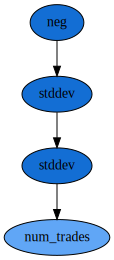

In [13]:
graph = alpha_factor_graph(1)
graph

{'name': 'v3_m1_alpha01_factor', 'IC mean': 0.0171, 'IC std': 0.0555, 'IR': 0.3086, 'IC>0': 0.621, 'ABS_IC>2%': 0.7123, 't_stat': 4.5668}


<Axes: title={'center': 'v3_m1_alpha01_factor'}>

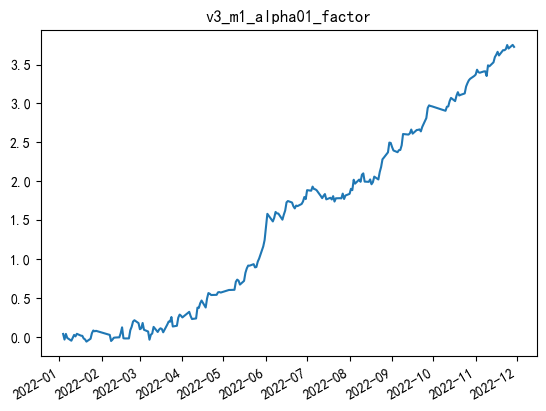

In [25]:
def v3_m1_alpha01(df):
    value_1 =  -1 * (df['num_trades']).rolling(10).std().rolling(10).std()
    value = value_1

    return value.unstack('order_book_id')
    
v3_m1_alpha01_factor = v3_m1_alpha01(gp_factor_train).dropna(how = 'all')
ic,performance = Quick_Factor_Return_N_IC(v3_m1_alpha01_factor,1,index_item,'v3_m1_alpha01_factor')
ic.cumsum().plot(title = 'v3_m1_alpha01_factor')

#### 因子二

neg(sma(abs(num_trades)))
fitness: 0.9596363636363635, depth: 3, length: 4


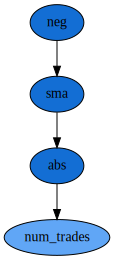

In [15]:
graph = alpha_factor_graph(2)
graph

{'name': 'v3_m1_alpha02_factor', 'IC mean': 0.0257, 'IC std': 0.0808, 'IR': 0.3176, 'IC>0': 0.6347, 'ABS_IC>2%': 0.7945, 't_stat': 4.7}


<Axes: title={'center': 'v3_m1_alpha02_factor'}>

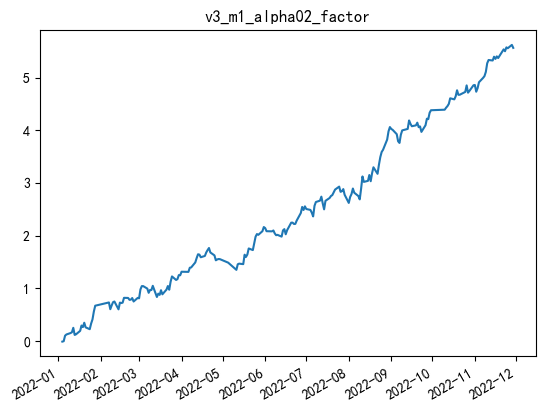

In [26]:
def v3_m1_alpha02(df):
    value_1 = -1 * (df['num_trades'].abs()).rolling(10).mean()
    value = value_1

    return value.unstack('order_book_id')

    
v3_m1_alpha02_factor = v3_m1_alpha02(gp_factor_train).dropna(how = 'all')
ic,performance = Quick_Factor_Return_N_IC(v3_m1_alpha02_factor,1,index_item,'v3_m1_alpha02_factor')
ic.cumsum().plot(title = 'v3_m1_alpha02_factor')

#### 因子三

add(sub(prev_close, turnover_ratio), sma(num_trades))
fitness: 0.9455151515151514, depth: 2, length: 6


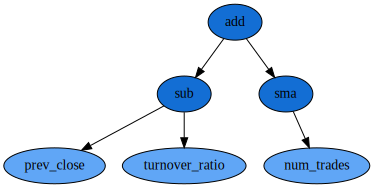

In [17]:
graph = alpha_factor_graph(3)
graph

{'name': 'v3_m1_alpha03_factor', 'IC mean': 0.015, 'IC std': 0.0893, 'IR': 0.1683, 'IC>0': 0.5936, 'ABS_IC>2%': 0.8402, 't_stat': 2.4907}


<Axes: title={'center': 'v3_m1_alpha03_factor'}>

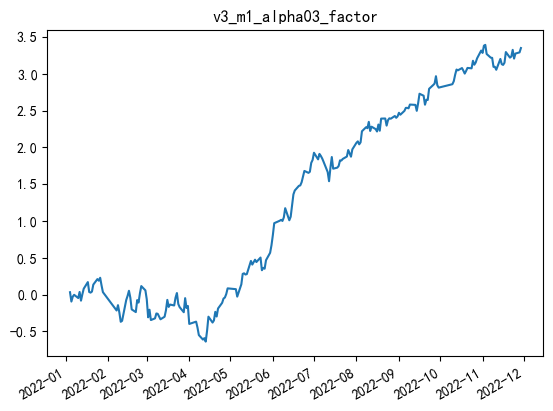

In [28]:
def v3_m1_alpha03(df):
    value_1 = (df['num_trades']).rolling(10).mean()
    value_2 = (df['prev_close'] - df['turnover_ratio'])
    value = value_1 + value_2
    # value = value.abs()
    
    return value.unstack('order_book_id')

    
v3_m1_alpha03_factor = v3_m1_alpha03(gp_factor_train).dropna(how = 'all')
ic,performance = Quick_Factor_Return_N_IC(v3_m1_alpha03_factor,1,index_item,'v3_m1_alpha03_factor')
ic.cumsum().plot(title = 'v3_m1_alpha03_factor')

#### 因子四

sub(num_trades, turnover_ratio)
fitness: 0.9485151515151514, depth: 1, length: 3


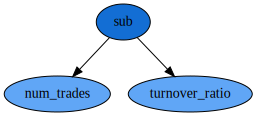

In [29]:
graph = alpha_factor_graph(4)
graph

{'name': 'v3_m1_alpha04_factor', 'IC mean': 0.0266, 'IC std': 0.0691, 'IR': 0.3856, 'IC>0': 0.653, 'ABS_IC>2%': 0.8037, 't_stat': 5.7069}


<Axes: title={'center': 'v3_m1_alpha04_factor'}>

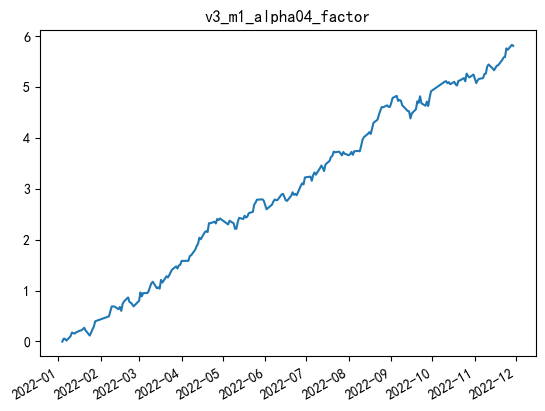

In [30]:
def v3_m1_alpha04(df):
    value_1 = df['num_trades']
    value_2 = df['turnover_ratio']
    value = value_1 - value_2

    return value.unstack('order_book_id')

    
v3_m1_alpha04_factor = v3_m1_alpha04(gp_factor_train).dropna(how = 'all')
ic,performance = Quick_Factor_Return_N_IC(v3_m1_alpha04_factor,1,index_item,'v3_m1_alpha04_factor')
ic.cumsum().plot(title = 'v3_m1_alpha04_factor')

#### 因子五

sub(add(abs(volume), div(close, volume)), add(mul(num_trades, volume), abs(total_turnover)))
fitness: 0.9385151515151514, depth: 3, length: 13


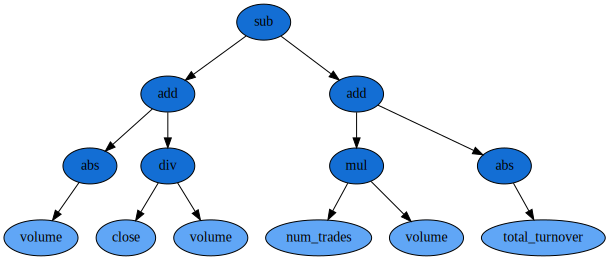

In [31]:
graph = alpha_factor_graph(5)
graph


{'name': 'v3_m1_alpha05_factor', 'IC mean': 0.0238, 'IC std': 0.0722, 'IR': 0.329, 'IC>0': 0.6073, 'ABS_IC>2%': 0.7854, 't_stat': 4.8689}


<Axes: title={'center': 'v3_m1_alpha05_factor'}>

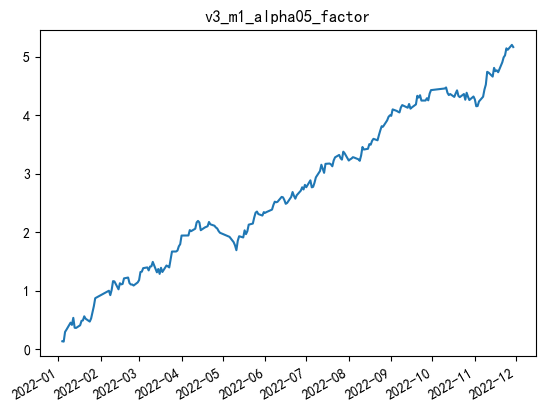

In [32]:
def v3_m1_alpha05(df):
    value_1 = df['volume'].abs() + (df['close']/df['volume'])
    value_2 = df['num_trades']*df['volume'] + df['total_turnover'].abs()
    value = value_1 - value_2

    return value.unstack('order_book_id')
    
v3_m1_alpha05_factor = v3_m1_alpha05(gp_factor_train).dropna(how = 'all')
ic,performance = Quick_Factor_Return_N_IC(v3_m1_alpha05_factor,1,index_item,'v3_m1_alpha05_factor')
ic.cumsum().plot(title = 'v3_m1_alpha05_factor')

## 模型训练二【多空收益】

In [33]:
def _my_metric_ud(y, y_pred, w):
    x1 = pd.Series(y.flatten() )
    for i in del_index:
        try:
            y_pred[i:i+window*5] = np.nan            # 删除y
        except:
            break
    x2 = pd.Series(y_pred.flatten())
    df = pd.concat([x1,x2],axis=1)
    df = df.dropna()
    df.columns = ['y','y_pred']
    df.sort_values(by = 'y_pred',ascending = False,inplace = True)
    gap = [int(i) for i in list(np.linspace(start = 0, stop = len(df), num = 11))]
    y_top = df["y"][0:gap[1]].mean()
    y_bottom = df["y"][gap[9]:].mean()
    value = (np.array([y_top]) - np.array([y_bottom]))[0]          # 不要加ABS 来让多空因子都试用
    
    return value

my_metric_ud = make_fitness(function=_my_metric_ud, greater_is_better=True)

In [45]:
def _my_metric_ud(y, y_pred, w):
    # 真实y 剔除间隔数据
    x1 = pd.Series(y.flatten() )
    for i in del_index:
        try:
            y_pred[i:i+window*5] = np.nan            # 删除y
        except:
            break

    # 预测y 
    x2 = pd.Series(y_pred.flatten())
    # 数据合并
    df = pd.concat([x1.to_frame('y'),
                    x2.to_frame('y_pred')],axis=1).dropna()
    
    # 根据预测y排降序 
    df.sort_values(by = 'y_pred',ascending = False,inplace = True)
    gap = [int(i) for i in list(np.linspace(start = 0, stop = len(df), num = 11))]
    # 多头
    y_top = df["y"][0:gap[1]].mean()
    y_top_std = df["y"][0:gap[1]].std()
    # 空头
    y_bottom = df["y"][gap[9]:].mean()
    y_top_std = df["y"][gap[9]:].std()

    value = (np.array([y_top]) - np.array([y_bottom]))[0]          # 不要加ABS 来让多空因子都试用
    # value = (np.array([y_top/y_top_std]) - np.array([y_bottom/y_top_std]))[0]

    return value

my_metric_ud = make_fitness(function=_my_metric_ud, greater_is_better=True)

In [46]:
# 训练集 测试集构建
X_train = np.nan_to_num(gp_factor_train[base_Factor].values)
y_train = np.nan_to_num(gp_data_train['ret_1'])

# 名称设置
metric_type = 'my_metric_ud'
version = 'v3'

# 表达式生成
generations = 3
population_size = 10000
random_state = 0


est_gp = SymbolicTransformer(feature_names = base_Factor,                     # 因子特征
                            function_set = function_set,                      # 算子式
                            stopping_criteria = 0.001,                        # 停止条件
                            metric = my_metric_ud,                            # 目标函数
                            generations = generations,                        # 遗传代数
                            population_size = population_size,                # 初始代数
                            tournament_size = 50,                             # 遗传过程保留数量
                            init_depth = (2,3),                               # 原始树深度
                            random_state = random_state,                      # 随机数种子
                            n_components = 20,                                # 遗传过程中保留低相关的个体 
                            const_range = (-1,1),                             # 常数项
                            n_jobs = -1                                       # 进程数量 （-1 为 全部）
                         )

# 模型拟合
est_gp.fit(X_train, y_train)

# 找出最优
best_programs = est_gp._best_programs
best_programs_dict = {}

# 记录结果
for p in best_programs:
    factor_name = 'alpha_' + str(best_programs.index(p) + 1)
    best_programs_dict[factor_name] = {'fitness':p.fitness_, 'expression':str(p), 'depth':p.depth_, 'length':p.length_}

best_programs_dict = pd.DataFrame(best_programs_dict).T
# best_programs_dict = best_programs_dict[best_programs_dict.fitness.abs() >= 0.2]
best_programs_dict = best_programs_dict.sort_values(by= 'fitness',ascending=False)
best_programs_dict

,fitness,expression,depth,length
alpha_1,-0.001612,"neg(sub(close, low))",2,4
alpha_7,-0.00196,"neg(sub(total_turnover, prev_close))",2,4
alpha_9,-0.002055,neg(stddev(sma(num_trades))),3,4
alpha_10,-0.002063,"sub(delta(num_trades), turnover_ratio)",2,4
alpha_12,-0.002101,"neg(sub(high, low))",2,4
alpha_20,-0.002249,"neg(add(close, volume))",2,4
alpha_13,-0.003106,"delta(sma(sub(prev_close, high)))",3,5
alpha_14,-0.00314,"neg(sma(mul(turnover_ratio, turnover_ratio)))",3,5
alpha_17,-0.003184,"sma(neg(mul(total_turnover, total_turnover)))",3,5
alpha_2,-0.003758,"mul(sub(low, total_turnover), stddev(prev_close))",2,6


In [47]:
create_dir_not_exist('./gp_result/')
best_programs_dict.to_csv(f'./gp_result/{version}_{metric_type}.csv')

### 因子构建
#### 因子一

neg(sub(close, low))
fitness: -0.0016117771111104954, depth: 2, length: 4


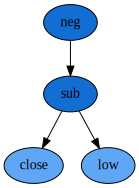

In [48]:
graph = alpha_factor_graph(1)
graph

{'name': 'v3_m2_alpha01_factor', 'IC mean': 0.0318, 'IC std': 0.0559, 'IR': 0.569, 'IC>0': 0.7169, 'ABS_IC>2%': 0.7763, 't_stat': 8.4204}


<Axes: title={'center': 'v3_m2_alpha01_factor'}>

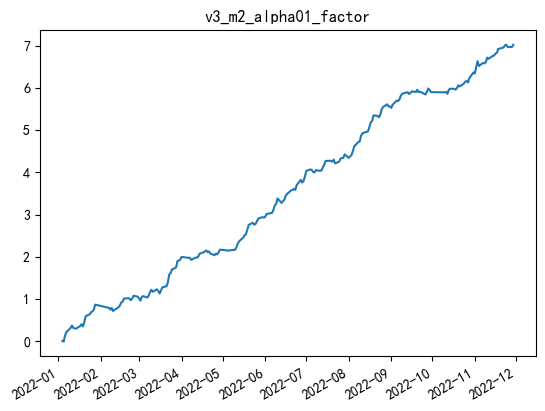

In [49]:
def v3_m2_alpha01(df):
    value1 = df['close'] - df['low']
    value = -1 * value1

    return value.unstack('order_book_id')
    
v3_m2_alpha01_factor = v3_m2_alpha01(gp_factor_train).dropna(how = 'all')
ic,performance = Quick_Factor_Return_N_IC(v3_m2_alpha01_factor,1,index_item,'v3_m2_alpha01_factor')
ic.cumsum().plot(title = 'v3_m2_alpha01_factor')

#### 因子二

mul(sub(low, total_turnover), stddev(prev_close))
fitness: -0.003758404705413955, depth: 2, length: 6


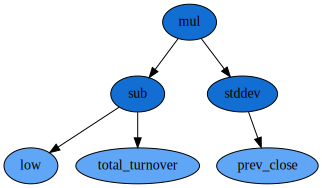

In [50]:
graph = alpha_factor_graph(2)
graph

{'name': 'v3_m2_alpha02_factor', 'IC mean': 0.0339, 'IC std': 0.1121, 'IR': 0.3023, 'IC>0': 0.6438, 'ABS_IC>2%': 0.8676, 't_stat': 4.4744}


<Axes: title={'center': 'v3_m2_alpha02_factor'}>

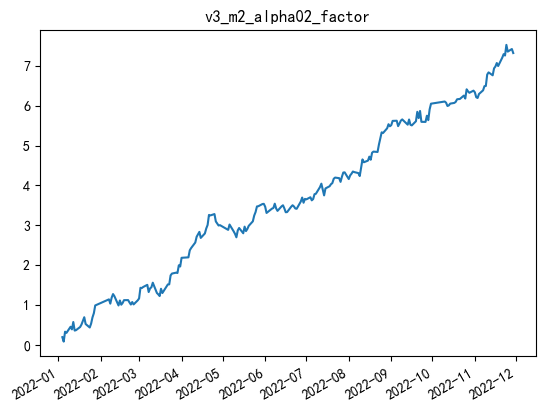

In [56]:
def v3_m2_alpha02(df):
    # value1 = df['low'] - df['total_turnover']
    value1 = df['low'] + df['total_turnover']
    value2 = df['prev_close'].rolling(10).std()
    value = value1 * value2
    value = -1 * value

    return value.unstack('order_book_id')
    
v3_m2_alpha02_factor = v3_m2_alpha02(gp_factor_train).dropna(how = 'all')
ic,performance = Quick_Factor_Return_N_IC(v3_m2_alpha02_factor,1,index_item,'v3_m2_alpha02_factor')
ic.cumsum().plot(title = 'v3_m2_alpha02_factor')

#### 因子三

mul(sub(num_trades, total_turnover), stddev(num_trades))
fitness: -0.003780958732711015, depth: 2, length: 6


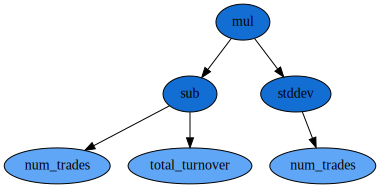

In [52]:
graph = alpha_factor_graph(3)
graph

{'name': 'v3_m2_alpha03_factor', 'IC mean': 0.0229, 'IC std': 0.0641, 'IR': 0.3564, 'IC>0': 0.6301, 'ABS_IC>2%': 0.7169, 't_stat': 5.2744}


<Axes: title={'center': 'v3_m2_alpha03_factor'}>

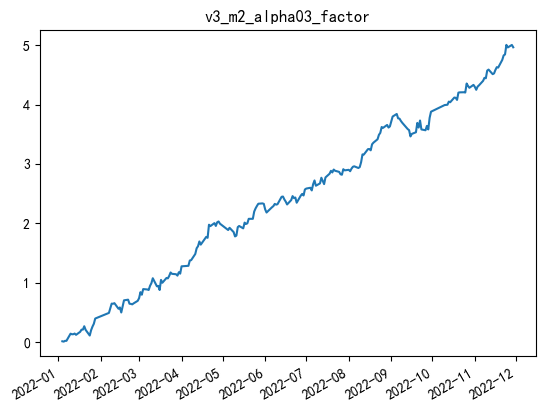

In [53]:
def v3_m2_alpha03(df):
    value1 = df['num_trades'] - df['total_turnover']
    value2 = df['num_trades'].rolling(10).std()
    value = value1 * value2

    return value.unstack('order_book_id')
    
v3_m2_alpha03_factor = v3_m2_alpha03(gp_factor_train).dropna(how = 'all')
ic,performance = Quick_Factor_Return_N_IC(v3_m2_alpha03_factor,1,index_item,'v3_m2_alpha03_factor')
ic.cumsum().plot(title = 'v3_m2_alpha03_factor')

#### 因子四

stddev(sub(sma(prev_close), sma(open)))
fitness: -0.003853444398817505, depth: 3, length: 6


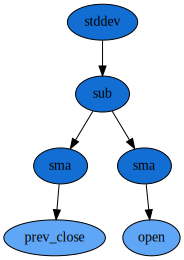

In [58]:
graph = alpha_factor_graph(4)
graph

{'name': 'v3_m2_alpha04_factor', 'IC mean': 0.0191, 'IC std': 0.114, 'IR': 0.1674, 'IC>0': 0.5525, 'ABS_IC>2%': 0.8128, 't_stat': 2.4778}


<Axes: title={'center': 'v3_m2_alpha04_factor'}>

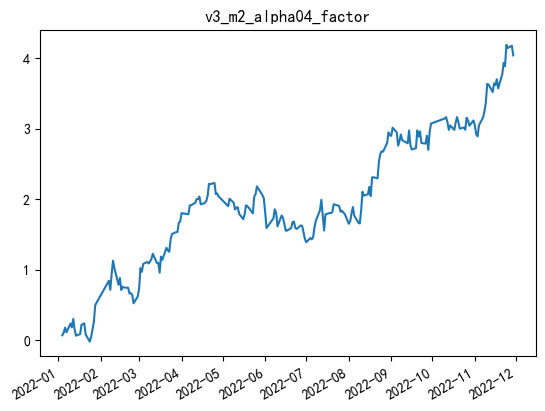

In [60]:
def v3_m2_alpha04(df):
    # value1 = df['low'] - df['total_turnover']
    value1 = df['prev_close'].rolling(10).mean()
    value2 = df['open'].rolling(10).mean()
    value = value1 - value2
    value = value.rolling(10).std()
    value = -1 * value

    return value.unstack('order_book_id')
    
v3_m2_alpha04_factor = v3_m2_alpha04(gp_factor_train).dropna(how = 'all')
ic,performance = Quick_Factor_Return_N_IC(v3_m2_alpha04_factor,1,index_item,'v3_m2_alpha04_factor')
ic.cumsum().plot(title = 'v3_m2_alpha04_factor')

#### 因子五

sub(high, mul(total_turnover, div(high, prev_close)))
fitness: -0.004916221033770679, depth: 3, length: 7


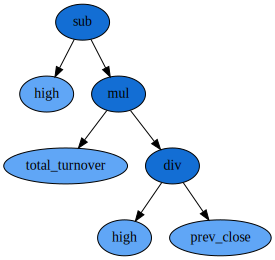

In [61]:
graph = alpha_factor_graph(5)
graph

{'name': 'v3_m2_alpha05_factor', 'IC mean': 0.0098, 'IC std': 0.0441, 'IR': 0.2212, 'IC>0': 0.5571, 'ABS_IC>2%': 0.6484, 't_stat': 3.2728}


<Axes: title={'center': 'v3_m2_alpha05_factor'}>

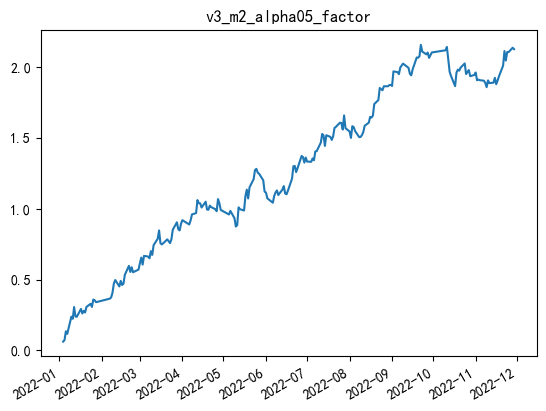

In [66]:
def v3_m2_alpha05(df):
    # value1 = df['low'] - df['total_turnover']
    value1 = df['high']/df['prev_close']
    value2 = df['total_turnover'] * value1
    value3 = df['high'] / value2
    value = value3

    return value.unstack('order_book_id')
    
v3_m2_alpha05_factor = v3_m2_alpha05(gp_factor_train).dropna(how = 'all')
ic,performance = Quick_Factor_Return_N_IC(v3_m2_alpha05_factor,1,index_item,'v3_m2_alpha05_factor')
ic.cumsum().plot(title = 'v3_m2_alpha05_factor')

## 模型训练三【内置Rank_IC】

In [68]:
# 训练集 测试集构建
X_train = np.nan_to_num(gp_factor_train[base_Factor].values)
y_train = np.nan_to_num(gp_data_train['ret_1'])

# 名称设置
metric_type = 'metric_spearman'
version = 'v3'

# 表达式生成
generations = 3
population_size = 10000
random_state = 0

# 参数设置
est_gp = SymbolicTransformer(feature_names = base_Factor,                     # 因子特征
                            function_set = function_set,                      # 算子式
                            stopping_criteria = 0.03,                         # 停止条件
                            metric = 'spearman',                         # 目标函数
                            generations = generations,                        # 遗传代数
                            population_size = population_size,                # 初始代数
                            tournament_size = 50,                             # 遗传过程保留数量
                            init_depth = (2,3),                               # 原始树深度
                            random_state = random_state,                      # 随机数种子
                            n_components = 20,                                # 遗传过程中保留低相关的个体 
                            const_range = (-1,1),                             # 常数项
                            n_jobs = -1                                       # 进程数量 （-1 为 全部）
                         )

# 模型拟合
est_gp.fit(X_train, y_train)

# 找出最优
best_programs = est_gp._best_programs
best_programs_dict = {}

# 记录结果
for p in best_programs:
    factor_name = 'alpha_' + str(best_programs.index(p) + 1)
    best_programs_dict[factor_name] = {'fitness':p.fitness_, 'expression':str(p), 'depth':p.depth_, 'length':p.length_}

best_programs_dict = pd.DataFrame(best_programs_dict).T
best_programs_dict = best_programs_dict[best_programs_dict.fitness.abs() >= 0.02]
best_programs_dict = best_programs_dict.sort_values(by= 'fitness',ascending=False)
# best_programs_dict = best_programs_dict.sort_values(by= 'fitness',ascending=True)
best_programs_dict

,fitness,expression,depth,length
alpha_1,0.036173,"stddev(mul(num_trades, stddev(open)))",3,5
alpha_3,0.034448,sma(stddev(open)),2,3
alpha_4,0.032564,stddev(delta(sma(low))),3,4
alpha_2,0.032307,"stddev(mul(stddev(num_trades), stddev(open)))",3,6
alpha_7,0.031443,sma(stddev(delta(prev_close))),3,4
alpha_5,0.029936,"stddev(mul(delta(close), stddev(low)))",3,6
alpha_8,0.029781,stddev(stddev(delta(low))),3,4
alpha_10,0.028878,"abs(sub(high, close))",2,4
alpha_6,0.028827,"stddev(add(add(open, 0.548), stddev(close)))",3,7
alpha_12,0.028521,neg(stddev(sma(open))),3,4


In [69]:
create_dir_not_exist('./gp_result/')
best_programs_dict.to_csv(f'./gp_result/{version}_{metric_type}.csv')

### 因子构建

#### 因子一

stddev(mul(num_trades, stddev(open)))
fitness: 0.036172563663555764, depth: 3, length: 5


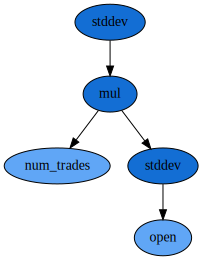

In [71]:
graph = alpha_factor_graph(1)
graph

{'name': 'v3_m3_alpha01_factor', 'IC mean': 0.0428, 'IC std': 0.1332, 'IR': 0.3212, 'IC>0': 0.621, 'ABS_IC>2%': 0.8858, 't_stat': 4.753}


<Axes: title={'center': 'v3_m3_alpha01_factor'}>

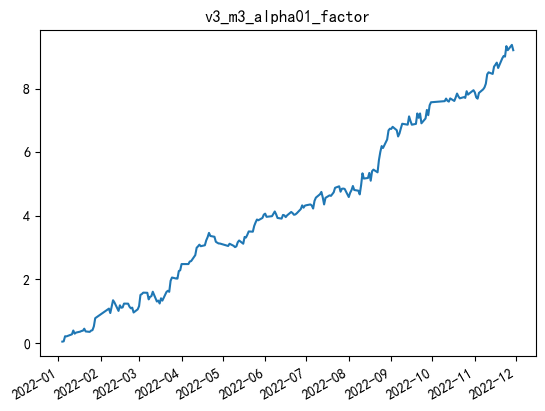

In [73]:
def v3_m3_alpha01(df):
    value = df['num_trades'] * df['open'].rolling(10).std()
    value = value.rolling(10).std()
    value = -1 * value
    
    return value.unstack('order_book_id')
    
v3_m3_alpha01_factor = v3_m3_alpha01(gp_factor_train).dropna(how = 'all')
ic,performance = Quick_Factor_Return_N_IC(v3_m3_alpha01_factor,1,index_item,'v3_m3_alpha01_factor')
ic.cumsum().plot(title = 'v3_m3_alpha01_factor')

#### 因子二

stddev(mul(stddev(num_trades), stddev(open)))
fitness: 0.03230693210268328, depth: 3, length: 6


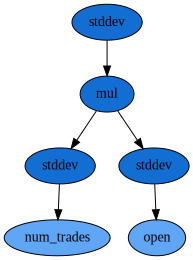

In [74]:
graph = alpha_factor_graph(2)
graph

{'name': 'v3_m3_alpha02_factor', 'IC mean': 0.0324, 'IC std': 0.1002, 'IR': 0.3235, 'IC>0': 0.621, 'ABS_IC>2%': 0.7991, 't_stat': 4.7881}


<Axes: title={'center': 'v3_m3_alpha02_factor'}>

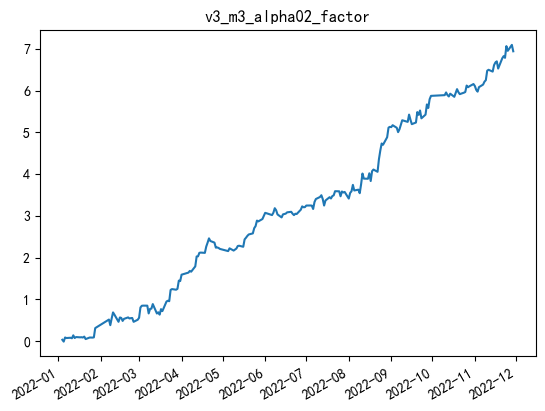

In [76]:
def v3_m3_alpha02(df):
    value_1 = df['num_trades'].rolling(10).std()
    value_2 = df['open'].rolling(10).std()
    value = value_1 * value_2
    value = value.rolling(10).std()
    value = -1 * value

    return value.unstack('order_book_id')
    
v3_m3_alpha02_factor = v3_m3_alpha02(gp_factor_train).dropna(how = 'all')
ic,performance = Quick_Factor_Return_N_IC(v3_m3_alpha02_factor,1,index_item,'v3_m3_alpha02_factor')
ic.cumsum().plot(title = 'v3_m3_alpha02_factor')

#### 因子三

sma(stddev(open))
fitness: 0.03444751946730447, depth: 2, length: 3


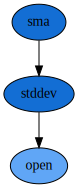

In [77]:
graph = alpha_factor_graph(3)
graph

{'name': 'v3_m3_alpha03_factor', 'IC mean': 0.0376, 'IC std': 0.1492, 'IR': 0.252, 'IC>0': 0.6027, 'ABS_IC>2%': 0.8676, 't_stat': 3.7286}


<Axes: title={'center': 'v3_m3_alpha03_factor'}>

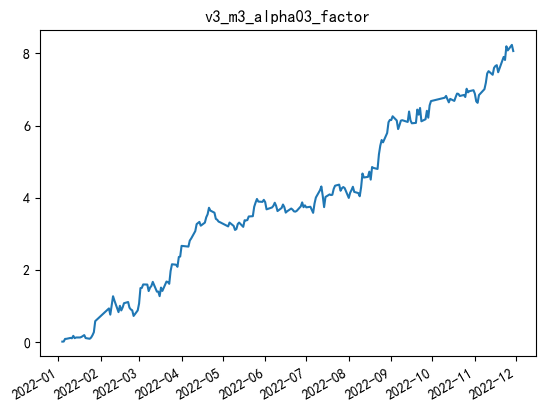

In [78]:
def v3_m3_alpha03(df):
    value_1 = df['open'].rolling(10).std()
    value = value_1.rolling(10).mean()
    value = -1 * value

    return value.unstack('order_book_id')
    
v3_m3_alpha03_factor = v3_m3_alpha03(gp_factor_train).dropna(how = 'all')
ic,performance = Quick_Factor_Return_N_IC(v3_m3_alpha03_factor,1,index_item,'v3_m3_alpha03_factor')
ic.cumsum().plot(title = 'v3_m3_alpha03_factor')

#### 因子四

stddev(delta(sma(low)))
fitness: 0.03256380014783239, depth: 3, length: 4


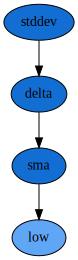

In [79]:
graph = alpha_factor_graph(4)
graph

{'name': 'v3_m3_alpha04_factor', 'IC mean': 0.0349, 'IC std': 0.1339, 'IR': 0.2605, 'IC>0': 0.5936, 'ABS_IC>2%': 0.8356, 't_stat': 3.8556}


<Axes: title={'center': 'v3_m3_alpha04_factor'}>

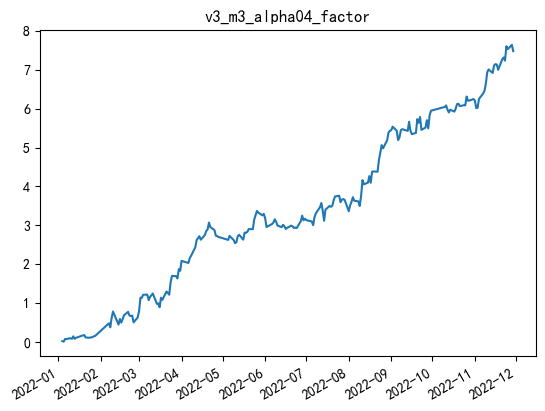

In [80]:
def v3_m3_alpha04(df):
    value_1 = df['low'].rolling(10).mean().diff()
    value = value_1.rolling(10).std()
    value = -1 * value

    return value.unstack('order_book_id')
    
v3_m3_alpha04_factor = v3_m3_alpha04(gp_factor_train).dropna(how = 'all')
ic,performance = Quick_Factor_Return_N_IC(v3_m3_alpha04_factor,1,index_item,'v3_m3_alpha04_factor')
ic.cumsum().plot(title = 'v3_m3_alpha04_factor')

#### 因子五

stddev(mul(delta(close), stddev(low)))
fitness: 0.029936273306467878, depth: 3, length: 6


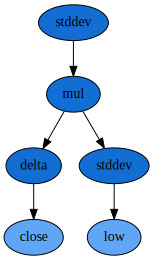

In [81]:
graph = alpha_factor_graph(5)
graph

{'name': 'v3_m3_alpha05_factor', 'IC mean': 0.0374, 'IC std': 0.1444, 'IR': 0.2588, 'IC>0': 0.5982, 'ABS_IC>2%': 0.9178, 't_stat': 3.8297}


<Axes: title={'center': 'v3_m3_alpha05_factor'}>

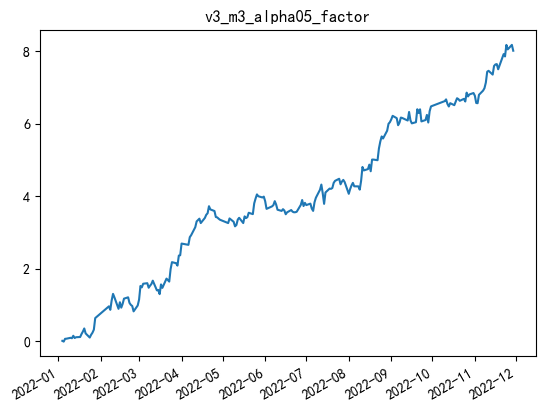

In [82]:
def v3_m3_alpha05(df):
    value_1 = df['close'].diff()
    value_2 = df['low'].rolling(10).std()
    value = value_1 * value_2
    value = value.rolling(10).std()
    value = -1 * value

    return value.unstack('order_book_id')
    
v3_m3_alpha05_factor = v3_m3_alpha05(gp_factor_train).dropna(how = 'all')
ic,performance = Quick_Factor_Return_N_IC(v3_m3_alpha05_factor,1,index_item,'v3_m3_alpha05_factor')
ic.cumsum().plot(title = 'v3_m3_alpha05_factor')

## 模型训练四【修正RANK_IC】

In [8]:
def _my_metric_rankic(y, y_pred, w):
    # 真实y 剔除间隔数据
    x1 = pd.Series(y.flatten())
    for i in del_index:
        try:
            y_pred[i:i+window*5] = np.nan            # 删除y
        except:
            break
    
    # 预测y 
    x2 = pd.Series(y_pred.flatten())
    # 数据合并
    df = pd.concat([x1.to_frame('y'),
                    x2.to_frame('y_pred')],axis=1).dropna()

    # 根据预测y排升序 
    df.sort_values(by = 'y_pred',ascending = False,inplace = True)
    #value = df.corr(method='spearman').iloc[0,1]
    value = (np.corrcoef(np.array(df['y']).argsort(),np.array(df['y_pred']).argsort())[0,1])
    
    return value

# 量价因子多反转
my_metric_rankic = make_fitness(function=_my_metric_rankic, greater_is_better=False)

In [9]:
# 训练集 测试集构建
X_train = np.nan_to_num(gp_factor_train[base_Factor].values)
y_train = np.nan_to_num(gp_data_train['ret_1'])


# 名称设置
metric_type = 'my_metric_spearman'
version = 'v3'

# 表达式生成
generations = 3
population_size = 10000
random_state = 0

# 参数设置
est_gp = SymbolicTransformer(feature_names = base_Factor,                     # 因子特征
                            function_set = function_set,                      # 算子式
                            stopping_criteria = 0.0001,                         # 停止条件
                            metric = my_metric_rankic,                        # 目标函数
                            generations = generations,                        # 遗传代数
                            population_size = population_size,                # 初始代数
                            tournament_size = 50,                             # 遗传过程保留数量
                            init_depth = (2,3),                               # 原始树深度
                            random_state = random_state,                      # 随机数种子
                            n_components = 20,                                # 遗传过程中保留低相关的个体 
                            const_range = (-1,1),                             # 常数项
                            n_jobs = -1                                       # 进程数量 （-1 为 全部）
                         )

# 模型拟合
est_gp.fit(X_train, y_train)

# 找出最优
best_programs = est_gp._best_programs
best_programs_dict = {}

# 记录结果
for p in best_programs:
    factor_name = 'alpha_' + str(best_programs.index(p) + 1)
    best_programs_dict[factor_name] = {'fitness':p.fitness_, 'expression':str(p), 'depth':p.depth_, 'length':p.length_}

best_programs_dict = pd.DataFrame(best_programs_dict).T
best_programs_dict = best_programs_dict[best_programs_dict.fitness.abs() >= 0.02]
# best_programs_dict = best_programs_dict.sort_values(by= 'fitness',ascending = False)
best_programs_dict = best_programs_dict.sort_values(by= 'fitness',ascending = True)
best_programs_dict


,fitness,expression,depth,length
alpha_1,-0.031952,"add(turnover_ratio, stddev(total_turnover))",2,4
alpha_3,-0.031024,"abs(sub(high, close))",2,4
alpha_5,-0.030335,"div(turnover_ratio, stddev(total_turnover))",2,4
alpha_6,-0.029963,"add(abs(high), turnover_ratio)",2,4
alpha_2,-0.029568,"div(turnover_ratio, stddev(add(high, turnover_...",3,6
alpha_12,-0.027718,"div(turnover_ratio, stddev(volume))",2,4
alpha_14,-0.027578,"mul(turnover_ratio, stddev(prev_close))",2,4
alpha_15,-0.027524,"mul(turnover_ratio, abs(low))",2,4
alpha_17,-0.027329,"add(total_turnover, abs(volume))",2,4
alpha_7,-0.027301,"sub(sub(close, low), delta(close))",2,6


In [10]:
create_dir_not_exist('./gp_result/')
best_programs_dict.to_csv(f'./gp_result/{version}_{metric_type}.csv')

### 因子构建
#### 因子一

add(turnover_ratio, stddev(total_turnover))
fitness: -0.03195202079795427, depth: 2, length: 4


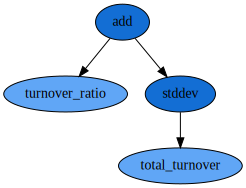

In [87]:
graph1 = alpha_factor_graph(1)
graph1

{'name': 'v3_m4_alpha01_factor', 'IC mean': 0.0345, 'IC std': 0.0784, 'IR': 0.4403, 'IC>0': 0.7123, 'ABS_IC>2%': 0.7763, 't_stat': 6.5165}


<Axes: title={'center': 'v3_m4_alpha01_factor'}>

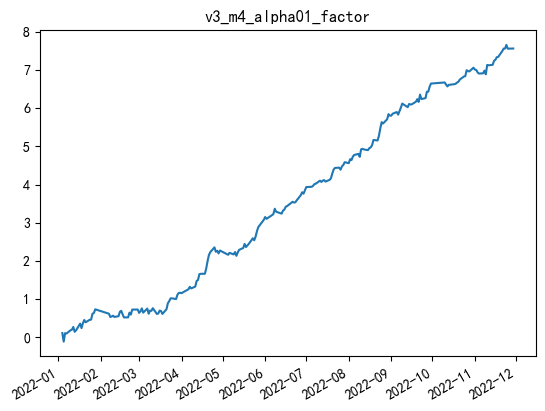

In [89]:
def v3_m4_alpha01(df):
    value_1 = df['turnover_ratio']
    value_2 = df['total_turnover'].rolling(10).std()
    value = value_1 * value_2

    value = -1 * value

    return value.unstack('order_book_id')
    
v3_m4_alpha01_factor = v3_m4_alpha01(gp_factor_train).dropna(how = 'all')
ic,performance = Quick_Factor_Return_N_IC(v3_m4_alpha01_factor,1,index_item,'v3_m4_alpha01_factor')
ic.cumsum().plot(title = 'v3_m4_alpha01_factor')

#### 因子二

div(turnover_ratio, stddev(add(high, turnover_ratio)))
fitness: -0.029568462181242337, depth: 3, length: 6


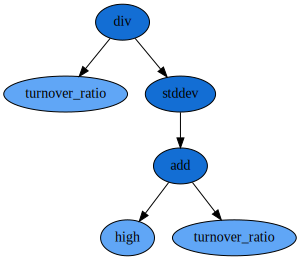

In [91]:
graph = alpha_factor_graph(2)
graph

{'name': 'v3_m4_alpha02_factor', 'IC mean': 0.0426, 'IC std': 0.1108, 'IR': 0.3846, 'IC>0': 0.6347, 'ABS_IC>2%': 0.8311, 't_stat': 5.6923}


<Axes: title={'center': 'v3_m4_alpha02_factor'}>

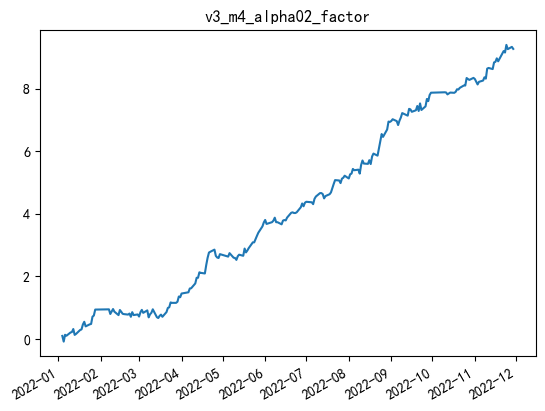

In [94]:
def v3_m4_alpha02(df):
    value_1 = df['turnover_ratio']
    value_2 = (df['high'] + df['total_turnover']).rolling(10).std()
    value = value_1 / value_2

    value = -1 * value

    return value.unstack('order_book_id')
    
v3_m4_alpha02_factor = v3_m4_alpha02(gp_factor_train).dropna(how = 'all')
ic,performance = Quick_Factor_Return_N_IC(v3_m4_alpha02_factor,1,index_item,'v3_m4_alpha02_factor')
ic.cumsum().plot(title = 'v3_m4_alpha02_factor')

#### 因子三

abs(sub(high, close))
fitness: -0.031024204659588172, depth: 2, length: 4


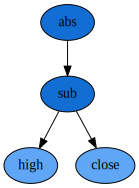

In [95]:
graph = alpha_factor_graph(3)
graph

{'name': 'v3_m4_alpha02_factor', 'IC mean': 0.0369, 'IC std': 0.0802, 'IR': 0.4606, 'IC>0': 0.6393, 'ABS_IC>2%': 0.8174, 't_stat': 6.8163}


<Axes: title={'center': 'v3_m4_alpha02_factor'}>

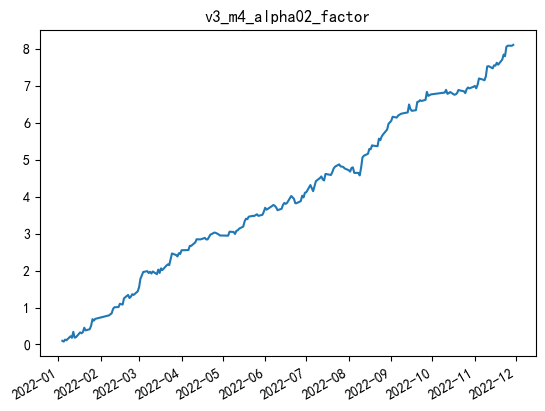

In [96]:
def v3_m4_alpha03(df):
    value = df['high'] - df['close']
    value = value.abs()

    value = -1 * value

    return value.unstack('order_book_id')
    
v3_m4_alpha03_factor = v3_m4_alpha03(gp_factor_train).dropna(how = 'all')
ic,performance = Quick_Factor_Return_N_IC(v3_m4_alpha03_factor,1,index_item,'v3_m4_alpha03_factor')
ic.cumsum().plot(title = 'v3_m4_alpha02_factor')

#### 因子四

sub(div(delta(high), div(turnover_ratio, prev_close)), sub(neg(turnover_ratio), stddev(total_turnover)))
fitness: -0.02296570815571038, depth: 3, length: 12


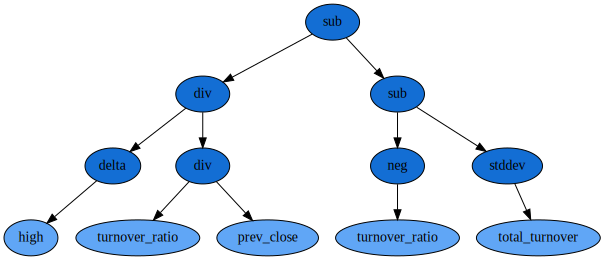

In [97]:
graph = alpha_factor_graph(4)
graph

{'name': 'v3_m4_alpha04_factor', 'IC mean': 0.0429, 'IC std': 0.0983, 'IR': 0.4362, 'IC>0': 0.653, 'ABS_IC>2%': 0.8311, 't_stat': 6.4553}


<Axes: title={'center': 'v3_m4_alpha04_factor'}>

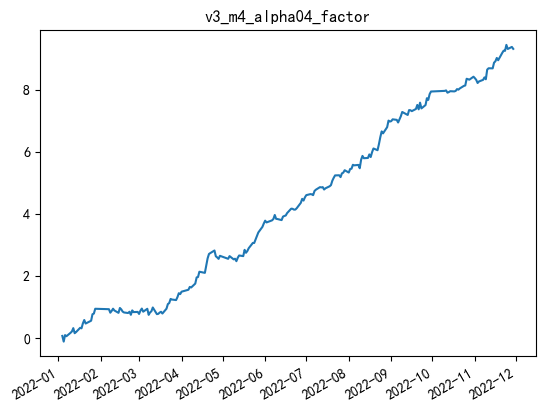

In [102]:
def v3_m4_alpha04(df):
    value_1 = df['high'].diff() / (df['turnover_ratio']/df['prev_close'])
    value_2 = (-1 * df['turnover_ratio']) - df['total_turnover'].rolling(10).std()

    value = value_1 - value_2

    value = -1 * value

    return value.unstack('order_book_id')
    
v3_m4_alpha04_factor = v3_m4_alpha04(gp_factor_train).dropna(how = 'all')
ic,performance = Quick_Factor_Return_N_IC(v3_m4_alpha04_factor,1,index_item,'v3_m4_alpha04_factor')
ic.cumsum().plot(title = 'v3_m4_alpha04_factor')

#### 因子五

div(turnover_ratio, stddev(total_turnover))
fitness: -0.03033536205780674, depth: 2, length: 4


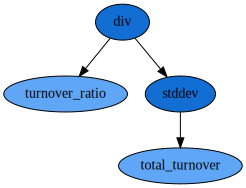

In [98]:
graph = alpha_factor_graph(5)
graph

{'name': 'v3_m4_alpha05_factor', 'IC mean': 0.0438, 'IC std': 0.1104, 'IR': 0.3965, 'IC>0': 0.6119, 'ABS_IC>2%': 0.8402, 't_stat': 5.8673}


<Axes: title={'center': 'v3_m4_alpha05_factor'}>

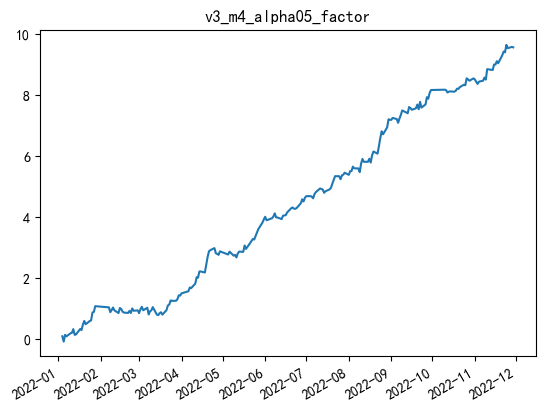

In [99]:
def v3_m4_alpha05(df):
    value = df['turnover_ratio'] / df['turnover_ratio'].rolling(10).std()

    value = -1 * value

    return value.unstack('order_book_id')
    
v3_m4_alpha05_factor = v3_m4_alpha05(gp_factor_train).dropna(how = 'all')
ic,performance = Quick_Factor_Return_N_IC(v3_m4_alpha05_factor,1,index_item,'v3_m4_alpha05_factor')
ic.cumsum().plot(title = 'v3_m4_alpha05_factor')

## gplearn因子汇总

In [112]:
# V1

def v1_alpha01(df):
    value = ((df['total_turnover'] + df['open']).rolling(10).mean()).rolling(10).std()

    return -1 * value.unstack('order_book_id')
    

def v1_alpha02(df):
    value = (0.715 - df['low']) - (df['open'] / df['total_turnover'])
    
    return -1 * value.unstack('order_book_id')


def v1_alpha03(df):
    value = df['total_turnover'].rolling(10).std()

    return -1 * value.unstack('order_book_id')

# V2

def v2_m1_alpha01(df):
    value_1 = (df['num_trades'] + df['num_trades']).abs()
    value_2 = (df['total_turnover'] * df['total_turnover']).abs()
    value = value_1 * value_2
    
    return -1 * value.unstack('order_book_id')

def v2_m1_alpha02(df):
    value = df['prev_close'].rolling(10).std().rolling(10).mean().dropna(how = 'all')
    
    return -1 *value.unstack('order_book_id')

def v2_m3_alpha01(df):
    value = df['total_turnover'] / df['close'].rolling(10).std()

    return -1 *value.unstack('order_book_id')

def v2_m3_alpha02(df):
    value = (0.698 * df['total_turnover']).diff().rolling(10).std()

    return -1 * value.unstack('order_book_id')

def v2_m3_alpha03(df):
    value = (df['num_trades'] * df['num_trades']).rolling(10).mean().dropna(how = 'all')

    return -1 * value.unstack('order_book_id')

def v2_m3_alpha04(df):
    value = (df['open'] - df['close']).abs()

    return -1 * value.unstack('order_book_id')

def v2_m4_alpha01(df):
    value = df['total_turnover'].diff().rolling(10).mean() - df['total_turnover']

    return value.unstack('order_book_id')


# V3

def v3_m1_alpha01(df):
    value_1 =  -1 * (df['num_trades']).rolling(10).std().rolling(10).std()
    value = value_1

    return value.unstack('order_book_id')


def v3_m1_alpha02(df):
    value_1 = -1 * (df['num_trades'].abs()).rolling(10).mean()
    value = value_1

    return value.unstack('order_book_id')


def v3_m1_alpha03(df):
    value_1 = (df['num_trades']).rolling(10).mean()
    value_2 = (df['prev_close'] - df['turnover_ratio'])
    value = value_1 + value_2
    value =-1 *  value.abs()
    
    return value.unstack('order_book_id')


def v3_m1_alpha04(df):
    value_1 = df['num_trades']
    value_2 = df['turnover_ratio']
    value = value_1 - value_2

    return value.unstack('order_book_id')


def v3_m1_alpha05(df):
    value_1 = df['volume'].abs() + (df['close']/df['volume'])
    value_2 = df['num_trades']*df['volume'] + df['total_turnover'].abs()
    value = value_1 - value_2

    return value.unstack('order_book_id')


def v3_m2_alpha01(df):
    value1 = df['close'] - df['low']
    value = -1 * value1

    return value.unstack('order_book_id')


def v3_m2_alpha02(df):
    # value1 = df['low'] - df['total_turnover']
    value1 = df['low'] + df['total_turnover']
    value2 = df['prev_close'].rolling(10).std()
    value = value1 * value2
    value = -1 * value

    return value.unstack('order_book_id')


def v3_m2_alpha03(df):
    value1 = df['num_trades'] - df['total_turnover']
    value2 = df['num_trades'].rolling(10).std()
    value = value1 * value2

    return value.unstack('order_book_id')


def v3_m2_alpha04(df):
    # value1 = df['low'] - df['total_turnover']
    value1 = df['prev_close'].rolling(10).mean()
    value2 = df['open'].rolling(10).mean()
    value = value1 - value2
    value = value.rolling(10).std()
    value = -1 * value

    return value.unstack('order_book_id')


def v3_m2_alpha05(df):
    # value1 = df['low'] - df['total_turnover']
    value1 = df['high']/df['prev_close']
    value2 = df['total_turnover'] * value1
    value3 = df['high'] / value2
    value = value3

    return value.unstack('order_book_id')


def v3_m3_alpha01(df):
    value = df['num_trades'] * df['open'].rolling(10).std()
    value = value.rolling(10).std()
    value = -1 * value

    return value.unstack('order_book_id')


def v3_m3_alpha02(df):
    value_1 = df['num_trades'].rolling(10).std()
    value_2 = df['open'].rolling(10).std()
    value = value_1 * value_2
    value = value.rolling(10).std()
    value = -1 * value

    return value.unstack('order_book_id')


def v3_m3_alpha03(df):
    value_1 = df['open'].rolling(10).std()
    value = value_1.rolling(10).mean()
    value = -1 * value

    return value.unstack('order_book_id')


def v3_m3_alpha04(df):
    value_1 = df['low'].rolling(10).mean().diff()
    value = value_1.rolling(10).std()
    value = -1 * value

    return value.unstack('order_book_id')


def v3_m3_alpha05(df):
    value_1 = df['close'].diff()
    value_2 = df['low'].rolling(10).std()
    value = value_1 * value_2
    value = value.rolling(10).std()
    value = -1 * value

    return value.unstack('order_book_id')


def v3_m4_alpha01(df):
    value_1 = df['turnover_ratio']
    value_2 = df['total_turnover'].rolling(10).std()
    value = value_1 * value_2

    value = -1 * value

    return value.unstack('order_book_id')


def v3_m4_alpha02(df):
    value_1 = df['turnover_ratio']
    value_2 = (df['high'] + df['total_turnover']).rolling(10).std()
    value = value_1 / value_2

    value = -1 * value

    return value.unstack('order_book_id')


def v3_m4_alpha03(df):
    value = df['high'] - df['close']
    value = value.abs()

    value = -1 * value

    return value.unstack('order_book_id')


def v3_m4_alpha04(df):
    value_1 = df['high'].diff() / (df['turnover_ratio']/df['prev_close'])
    value_2 = (-1 * df['turnover_ratio']) - df['total_turnover'].rolling(10).std()

    value = value_1 - value_2

    value = -1 * value

    return value.unstack('order_book_id')


def v3_m4_alpha05(df):
    value = df['turnover_ratio'] / df['turnover_ratio'].rolling(10).std()

    value = -1 * value

    return value.unstack('order_book_id')

## 样本内检验

In [132]:
gp_factor = pd.read_pickle('./data/gp_data.pkl').swaplevel().sort_index()        # 确保index标的在前，日期在后
gp_factor = gp_factor.drop(['ret_1','excess_return'],axis = 1)
gp_factor.head()

volume      high  prev_close  total_turnover  \
order_book_id datetime                                                     
000006.XSHE   2020-06-15  1.451784 -0.199267   -0.207879        2.335719   
              2020-06-16  1.545577 -0.157383   -0.141899        2.286159   
              2020-06-17  1.358509 -0.123837   -0.109431        2.395932   
              2020-06-18  1.480632 -0.125776   -0.155390        2.310070   
              2020-06-19  1.340382 -0.142506   -0.113306        2.364816   

                             close  num_trades      open       low  \
order_book_id datetime                                               
000006.XSHE   2020-06-15 -0.160232    1.347231 -0.253822 -0.243315   
              2020-06-16 -0.174821    2.287266 -0.176760 -0.204018   
              2020-06-17 -0.177378    2.299137 -0.184426 -0.173073   
              2020-06-18 -0.139723    2.265944 -0.175531 -0.150314   
              2020-06-19 -0.134842    2.341613 -0.157463 -0.162984   

                          turnover_ratio  
order_book_id datetime                    
000006.XSHE   2020-06-15        1.972908  
              2020-06-16        2.259378  
              2020-06-17        2.323486  
              2020-06-18        2.293409  
              2020-06-19        1.868330

In [113]:
# v1
v1_alpha01_factor = v1_alpha01(gp_factor_train).dropna(how = 'all')
v1_alpha02_factor = v1_alpha02(gp_factor_train).dropna(how = 'all')
v1_alpha02_factor = v1_alpha03(gp_factor_train).dropna(how = 'all')

# v2
v2_m1_alpha01_factor = v2_m1_alpha01(gp_factor_train).dropna(how = 'all')
v2_m1_alpha02_factor = v2_m1_alpha02(gp_factor_train).dropna(how = 'all')
v2_m3_alpha01_factor = v2_m3_alpha01(gp_factor_train).dropna(how = 'all')
v2_m3_alpha02_factor = v2_m3_alpha02(gp_factor_train).dropna(how = 'all')
v2_m3_alpha03_factor = v2_m3_alpha03(gp_factor_train).dropna(how = 'all')
v2_m3_alpha04_factor = v2_m3_alpha04(gp_factor_train).dropna(how = 'all')
v2_m4_alpha01_factor = v2_m4_alpha01(gp_factor_train).dropna(how = 'all')

# v3
v3_m1_alpha01_factor = v3_m1_alpha01(gp_factor_train).dropna(how = 'all')
v3_m1_alpha02_factor = v3_m1_alpha02(gp_factor_train).dropna(how = 'all')
v3_m1_alpha03_factor = v3_m1_alpha03(gp_factor_train).dropna(how = 'all')
v3_m1_alpha04_factor = v3_m1_alpha04(gp_factor_train).dropna(how = 'all')
v3_m1_alpha05_factor = v3_m1_alpha05(gp_factor_train).dropna(how = 'all')

v3_m2_alpha01_factor = v3_m2_alpha01(gp_factor_train).dropna(how = 'all')
v3_m2_alpha02_factor = v3_m2_alpha02(gp_factor_train).dropna(how = 'all')
v3_m2_alpha03_factor = v3_m2_alpha03(gp_factor_train).dropna(how = 'all')
v3_m2_alpha04_factor = v3_m2_alpha04(gp_factor_train).dropna(how = 'all')
v3_m2_alpha05_factor = v3_m2_alpha05(gp_factor_train).dropna(how = 'all')

v3_m3_alpha01_factor = v3_m3_alpha01(gp_factor_train).dropna(how = 'all')
v3_m3_alpha02_factor = v3_m3_alpha02(gp_factor_train).dropna(how = 'all')
v3_m3_alpha03_factor = v3_m3_alpha03(gp_factor_train).dropna(how = 'all')
v3_m3_alpha04_factor = v3_m3_alpha04(gp_factor_train).dropna(how = 'all')
v3_m3_alpha05_factor = v3_m3_alpha05(gp_factor_train).dropna(how = 'all')

v3_m4_alpha01_factor = v3_m4_alpha01(gp_factor_train).dropna(how = 'all')
v3_m4_alpha02_factor = v3_m4_alpha02(gp_factor_train).dropna(how = 'all')
v3_m4_alpha03_factor = v3_m4_alpha03(gp_factor_train).dropna(how = 'all')
v3_m4_alpha04_factor = v3_m4_alpha04(gp_factor_train).dropna(how = 'all')
v3_m4_alpha05_factor = v3_m4_alpha05(gp_factor_train).dropna(how = 'all')

In [130]:
factor_names = ['v1_alpha01_factor','v1_alpha02_factor','v1_alpha02_factor',
                'v2_m1_alpha01_factor','v2_m1_alpha02_factor',
                'v2_m3_alpha01_factor','v2_m3_alpha02_factor',
                'v2_m3_alpha03_factor','v2_m3_alpha04_factor',
                'v2_m4_alpha01_factor',
                'v3_m1_alpha01_factor','v3_m1_alpha02_factor','v3_m1_alpha03_factor','v3_m1_alpha04_factor','v3_m1_alpha05_factor',
                'v3_m2_alpha01_factor','v3_m2_alpha02_factor','v3_m2_alpha03_factor','v3_m2_alpha04_factor','v3_m2_alpha05_factor',
                'v3_m3_alpha01_factor','v3_m3_alpha02_factor','v3_m3_alpha03_factor','v3_m3_alpha04_factor','v3_m3_alpha05_factor',
                'v3_m4_alpha01_factor','v3_m4_alpha02_factor','v3_m4_alpha03_factor','v3_m4_alpha04_factor','v3_m4_alpha05_factor',
                ]

ic_df_train = pd.DataFrame()
for i in tqdm(factor_names):
    ic_temp,performance = Quick_Factor_Return_N_IC(eval(i),1,index_item,i)
    ic_df_train[i] = ic_temp
ic_df_train = ic_df_train.sort_index()
create_dir_not_exist('./data/report')
ic_df_train.to_pickle('./data/report/ic_df_train.pkl')

  7%|▋         | 2/30 [00:00<00:01, 14.71it/s]

{'name': 'v1_alpha01_factor', 'IC mean': 0.0218, 'IC std': 0.0616, 'IR': 0.3539, 'IC>0': 0.6301, 'ABS_IC>2%': 0.7443, 't_stat': 5.2373}
{'name': 'v1_alpha02_factor', 'IC mean': 0.0287, 'IC std': 0.0678, 'IR': 0.4229, 'IC>0': 0.6438, 'ABS_IC>2%': 0.8037, 't_stat': 6.2579}
{'name': 'v1_alpha02_factor', 'IC mean': 0.0287, 'IC std': 0.0678, 'IR': 0.4229, 'IC>0': 0.6438, 'ABS_IC>2%': 0.8037, 't_stat': 6.2579}


 20%|██        | 6/30 [00:00<00:01, 14.77it/s]

{'name': 'v2_m1_alpha01_factor', 'IC mean': 0.0232, 'IC std': 0.0671, 'IR': 0.3455, 'IC>0': 0.6301, 'ABS_IC>2%': 0.8128, 't_stat': 5.113}
{'name': 'v2_m1_alpha02_factor', 'IC mean': 0.0392, 'IC std': 0.1468, 'IR': 0.2672, 'IC>0': 0.602, 'ABS_IC>2%': 0.8905, 't_stat': 3.788}
{'name': 'v2_m3_alpha01_factor', 'IC mean': 0.0384, 'IC std': 0.094, 'IR': 0.4085, 'IC>0': 0.6758, 'ABS_IC>2%': 0.8356, 't_stat': 6.0452}
{'name': 'v2_m3_alpha02_factor', 'IC mean': 0.026, 'IC std': 0.0688, 'IR': 0.3776, 'IC>0': 0.6393, 'ABS_IC>2%': 0.8219, 't_stat': 5.5877}


 33%|███▎      | 10/30 [00:00<00:01, 14.61it/s]

{'name': 'v2_m3_alpha03_factor', 'IC mean': 0.0286, 'IC std': 0.0847, 'IR': 0.3374, 'IC>0': 0.6143, 'ABS_IC>2%': 0.8143, 't_stat': 4.8887}
{'name': 'v2_m3_alpha04_factor', 'IC mean': 0.0319, 'IC std': 0.0799, 'IR': 0.3996, 'IC>0': 0.653, 'ABS_IC>2%': 0.8174, 't_stat': 5.9129}
{'name': 'v2_m4_alpha01_factor', 'IC mean': 0.0362, 'IC std': 0.0991, 'IR': 0.3652, 'IC>0': 0.6347, 'ABS_IC>2%': 0.8584, 't_stat': 5.4052}
{'name': 'v3_m1_alpha01_factor', 'IC mean': 0.0171, 'IC std': 0.0555, 'IR': 0.3086, 'IC>0': 0.621, 'ABS_IC>2%': 0.7123, 't_stat': 4.5668}


 47%|████▋     | 14/30 [00:00<00:01, 14.23it/s]

{'name': 'v3_m1_alpha02_factor', 'IC mean': 0.0257, 'IC std': 0.0808, 'IR': 0.3176, 'IC>0': 0.6347, 'ABS_IC>2%': 0.7945, 't_stat': 4.7}
{'name': 'v3_m1_alpha03_factor', 'IC mean': 0.0175, 'IC std': 0.0532, 'IR': 0.3289, 'IC>0': 0.6484, 'ABS_IC>2%': 0.7352, 't_stat': 4.8667}
{'name': 'v3_m1_alpha04_factor', 'IC mean': 0.0266, 'IC std': 0.0691, 'IR': 0.3856, 'IC>0': 0.653, 'ABS_IC>2%': 0.8037, 't_stat': 5.7069}


 60%|██████    | 18/30 [00:01<00:00, 14.02it/s]

{'name': 'v3_m1_alpha05_factor', 'IC mean': 0.0238, 'IC std': 0.0722, 'IR': 0.329, 'IC>0': 0.6073, 'ABS_IC>2%': 0.7854, 't_stat': 4.8689}
{'name': 'v3_m2_alpha01_factor', 'IC mean': 0.0318, 'IC std': 0.0559, 'IR': 0.569, 'IC>0': 0.7169, 'ABS_IC>2%': 0.7763, 't_stat': 8.4204}
{'name': 'v3_m2_alpha02_factor', 'IC mean': 0.0339, 'IC std': 0.1121, 'IR': 0.3023, 'IC>0': 0.6438, 'ABS_IC>2%': 0.8676, 't_stat': 4.4744}
{'name': 'v3_m2_alpha03_factor', 'IC mean': 0.0229, 'IC std': 0.0641, 'IR': 0.3564, 'IC>0': 0.6301, 'ABS_IC>2%': 0.7169, 't_stat': 5.2744}


 67%|██████▋   | 20/30 [00:01<00:00, 13.98it/s]

{'name': 'v3_m2_alpha04_factor', 'IC mean': 0.0191, 'IC std': 0.114, 'IR': 0.1674, 'IC>0': 0.5525, 'ABS_IC>2%': 0.8128, 't_stat': 2.4778}
{'name': 'v3_m2_alpha05_factor', 'IC mean': 0.0098, 'IC std': 0.0441, 'IR': 0.2212, 'IC>0': 0.5571, 'ABS_IC>2%': 0.6484, 't_stat': 3.2728}
{'name': 'v3_m3_alpha01_factor', 'IC mean': 0.0428, 'IC std': 0.1332, 'IR': 0.3212, 'IC>0': 0.621, 'ABS_IC>2%': 0.8858, 't_stat': 4.753}


 80%|████████  | 24/30 [00:01<00:00, 14.15it/s]

{'name': 'v3_m3_alpha02_factor', 'IC mean': 0.0324, 'IC std': 0.1002, 'IR': 0.3235, 'IC>0': 0.621, 'ABS_IC>2%': 0.7991, 't_stat': 4.7881}
{'name': 'v3_m3_alpha03_factor', 'IC mean': 0.0376, 'IC std': 0.1492, 'IR': 0.252, 'IC>0': 0.6027, 'ABS_IC>2%': 0.8676, 't_stat': 3.7286}
{'name': 'v3_m3_alpha04_factor', 'IC mean': 0.0349, 'IC std': 0.1339, 'IR': 0.2605, 'IC>0': 0.5936, 'ABS_IC>2%': 0.8356, 't_stat': 3.8556}
{'name': 'v3_m3_alpha05_factor', 'IC mean': 0.0374, 'IC std': 0.1444, 'IR': 0.2588, 'IC>0': 0.5982, 'ABS_IC>2%': 0.9178, 't_stat': 3.8297}


 93%|█████████▎| 28/30 [00:01<00:00, 14.03it/s]

{'name': 'v3_m4_alpha01_factor', 'IC mean': 0.0345, 'IC std': 0.0784, 'IR': 0.4403, 'IC>0': 0.7123, 'ABS_IC>2%': 0.7763, 't_stat': 6.5165}
{'name': 'v3_m4_alpha02_factor', 'IC mean': 0.0426, 'IC std': 0.1108, 'IR': 0.3846, 'IC>0': 0.6347, 'ABS_IC>2%': 0.8311, 't_stat': 5.6923}
{'name': 'v3_m4_alpha03_factor', 'IC mean': 0.0369, 'IC std': 0.0802, 'IR': 0.4606, 'IC>0': 0.6393, 'ABS_IC>2%': 0.8174, 't_stat': 6.8163}
{'name': 'v3_m4_alpha04_factor', 'IC mean': 0.0429, 'IC std': 0.0983, 'IR': 0.4362, 'IC>0': 0.653, 'ABS_IC>2%': 0.8311, 't_stat': 6.4553}


100%|██████████| 30/30 [00:02<00:00, 14.24it/s]

{'name': 'v3_m4_alpha05_factor', 'IC mean': 0.0438, 'IC std': 0.1104, 'IR': 0.3965, 'IC>0': 0.6119, 'ABS_IC>2%': 0.8402, 't_stat': 5.8673}


In [121]:
# 累计ic图
def cumic(name,ic_df):
    """
    :param name: 因子名称 -> list 
    :param ic_df: ic序列表 -> dataframe 
    :return fig: 累计ic图 -> plot
    """
    ic_df[name].cumsum().plot(figsize = (len(name)/2,len(name)/4))

# 热力图    
def hot_corr(name,ic_df):
    """
    :param name: 因子名称 -> list 
    :param ic_df: ic序列表 -> dataframe 
    :return fig: 热力图 -> plt
    """
    ax = plt.subplots(figsize=(len(name), len(name)))#调整画布大小
    ax = sns.heatmap(ic_df[name].corr(),vmin=0.4, square=True, annot= True,cmap = 'Blues')   #annot=True 表示显示系数
    plt.title('Factors_IC_CORRELATION')
    # 设置刻度字体大小
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

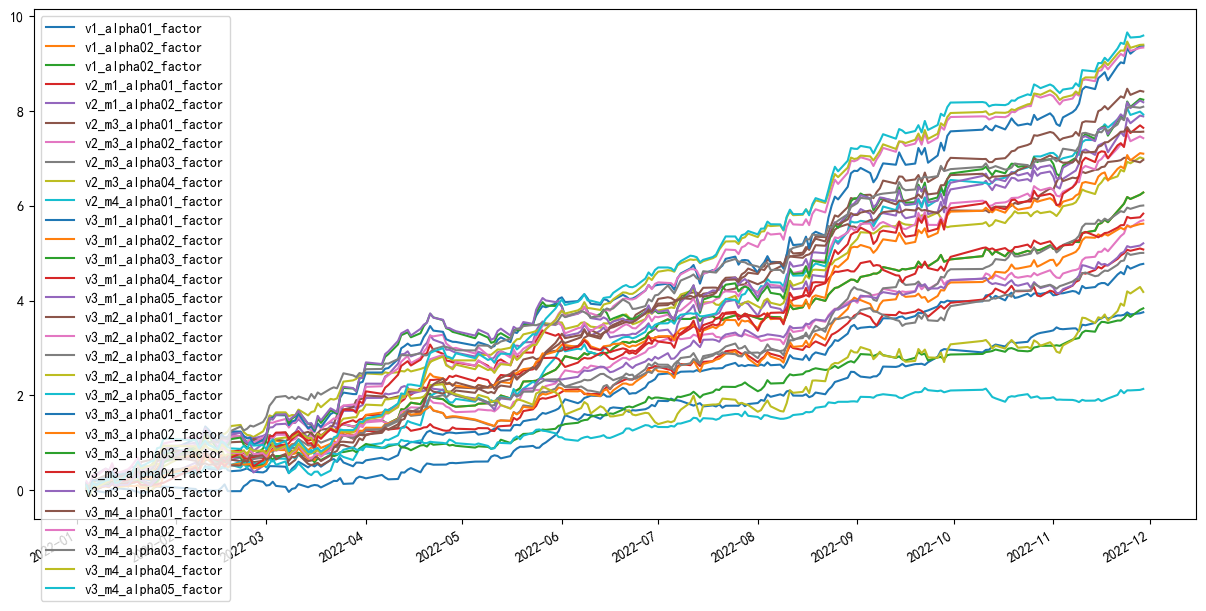

In [122]:
cumic(factor_names,ic_df_train)

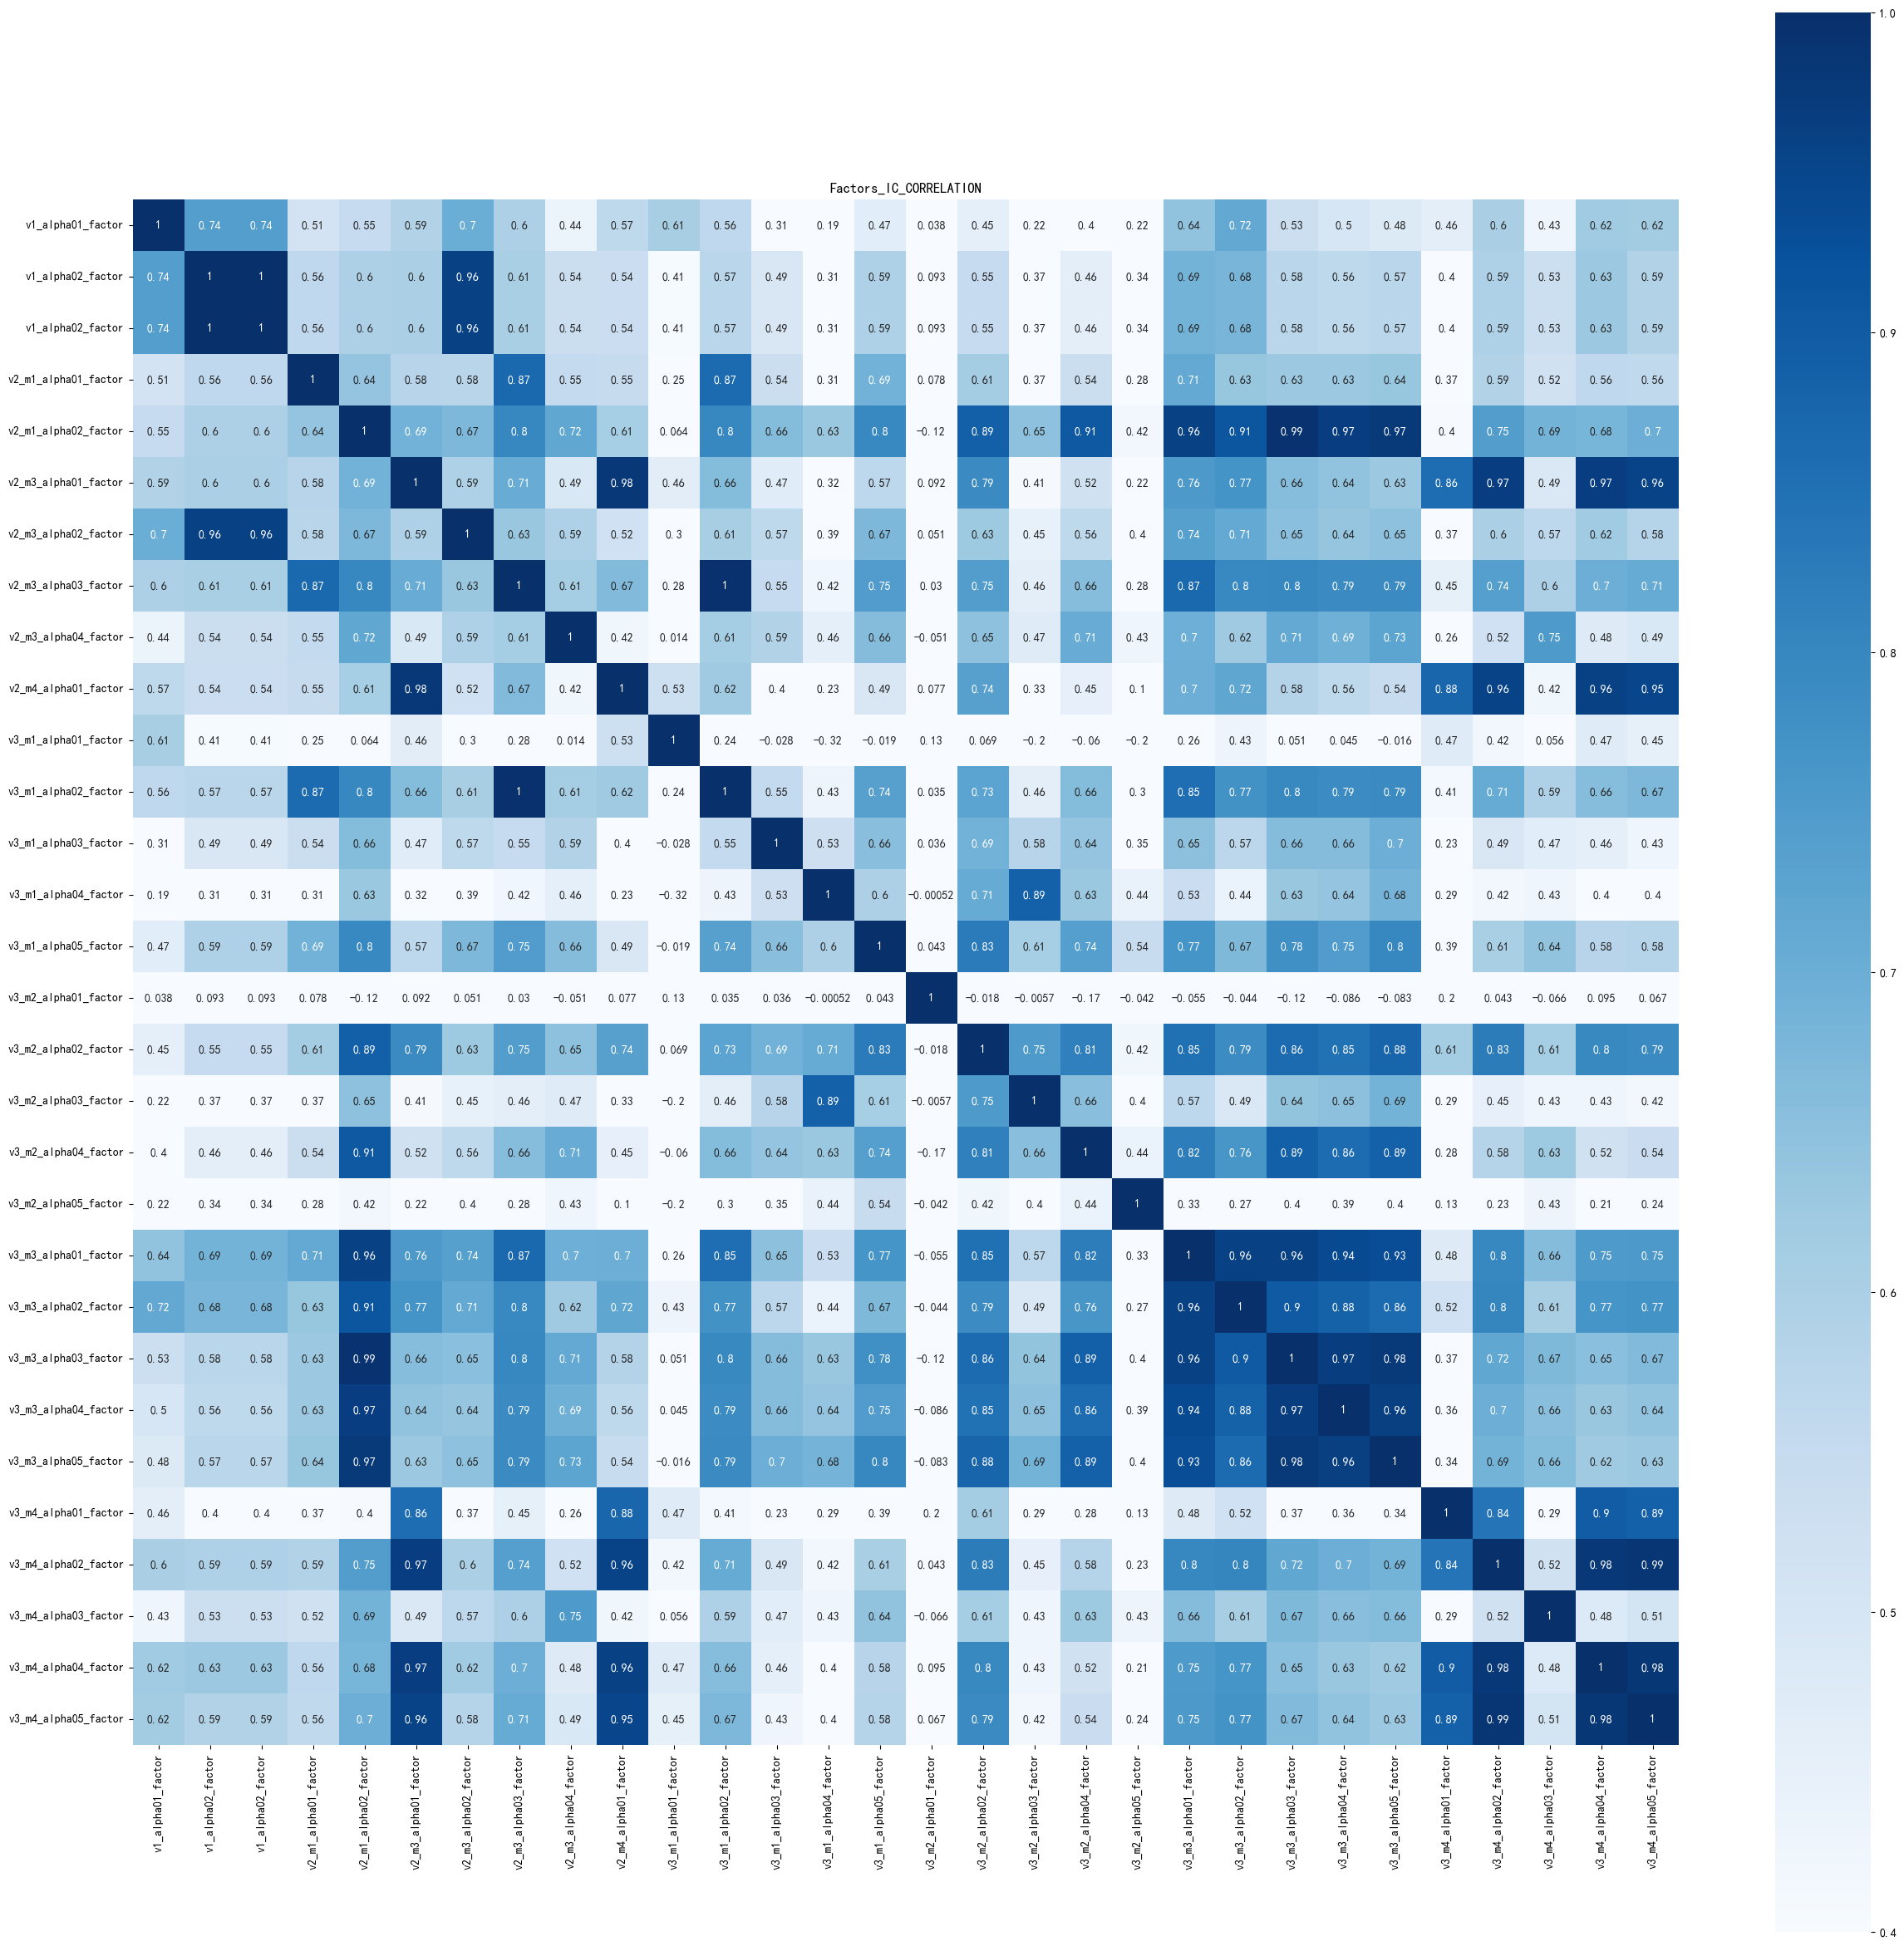

In [125]:
hot_corr(factor_names,ic_df_train)

In [126]:
def corr_filter(pass_icir_factor,factor_performance,low):
    # 计算各因子指标序列相关性
    ic_summary = factor_performance[pass_icir_factor].mean()/factor_performance[pass_icir_factor].std()
    pass_icir_factor = ic_summary.sort_values(ascending=False).index.tolist()
    corr_df = factor_performance[pass_icir_factor].corr()

    # 相关性过滤
    length = corr_df.shape[1]
    pass_list = []
    for i in range(length):
        try:
            pass_list.append(corr_df.index.tolist()[0])
            corr_df = corr_df[(abs(corr_df.iloc[:, 0]) < low)]
            corr_df = corr_df[corr_df.index.tolist()]
        except:
            break
    
    return pass_list

In [128]:
factor_names_pass = corr_filter(factor_names,ic_df_train,0.6)

In [129]:
factor_names_pass

['v3_m2_alpha01_factor',
 'v3_m4_alpha03_factor',
 'v3_m4_alpha01_factor',
 'v1_alpha02_factor',
 'v3_m1_alpha04_factor',
 'v2_m1_alpha01_factor',
 'v3_m1_alpha03_factor',
 'v3_m1_alpha01_factor',
 'v3_m2_alpha05_factor']

## 样本外检验

In [133]:
# v1
v1_alpha01_factor = v1_alpha01(gp_factor).dropna(how = 'all')
v1_alpha02_factor = v1_alpha02(gp_factor).dropna(how = 'all')
v1_alpha02_factor = v1_alpha03(gp_factor).dropna(how = 'all')

# v2
v2_m1_alpha01_factor = v2_m1_alpha01(gp_factor).dropna(how = 'all')
v2_m1_alpha02_factor = v2_m1_alpha02(gp_factor).dropna(how = 'all')
v2_m3_alpha01_factor = v2_m3_alpha01(gp_factor).dropna(how = 'all')
v2_m3_alpha02_factor = v2_m3_alpha02(gp_factor).dropna(how = 'all')
v2_m3_alpha03_factor = v2_m3_alpha03(gp_factor).dropna(how = 'all')
v2_m3_alpha04_factor = v2_m3_alpha04(gp_factor).dropna(how = 'all')
v2_m4_alpha01_factor = v2_m4_alpha01(gp_factor).dropna(how = 'all')

# v3
v3_m1_alpha01_factor = v3_m1_alpha01(gp_factor).dropna(how = 'all')
v3_m1_alpha02_factor = v3_m1_alpha02(gp_factor).dropna(how = 'all')
v3_m1_alpha03_factor = v3_m1_alpha03(gp_factor).dropna(how = 'all')
v3_m1_alpha04_factor = v3_m1_alpha04(gp_factor).dropna(how = 'all')
v3_m1_alpha05_factor = v3_m1_alpha05(gp_factor).dropna(how = 'all')

v3_m2_alpha01_factor = v3_m2_alpha01(gp_factor).dropna(how = 'all')
v3_m2_alpha02_factor = v3_m2_alpha02(gp_factor).dropna(how = 'all')
v3_m2_alpha03_factor = v3_m2_alpha03(gp_factor).dropna(how = 'all')
v3_m2_alpha04_factor = v3_m2_alpha04(gp_factor).dropna(how = 'all')
v3_m2_alpha05_factor = v3_m2_alpha05(gp_factor).dropna(how = 'all')

v3_m3_alpha01_factor = v3_m3_alpha01(gp_factor).dropna(how = 'all')
v3_m3_alpha02_factor = v3_m3_alpha02(gp_factor).dropna(how = 'all')
v3_m3_alpha03_factor = v3_m3_alpha03(gp_factor).dropna(how = 'all')
v3_m3_alpha04_factor = v3_m3_alpha04(gp_factor).dropna(how = 'all')
v3_m3_alpha05_factor = v3_m3_alpha05(gp_factor).dropna(how = 'all')

v3_m4_alpha01_factor = v3_m4_alpha01(gp_factor).dropna(how = 'all')
v3_m4_alpha02_factor = v3_m4_alpha02(gp_factor).dropna(how = 'all')
v3_m4_alpha03_factor = v3_m4_alpha03(gp_factor).dropna(how = 'all')
v3_m4_alpha04_factor = v3_m4_alpha04(gp_factor).dropna(how = 'all')
v3_m4_alpha05_factor = v3_m4_alpha05(gp_factor).dropna(how = 'all')

In [147]:
factor_names = ['v1_alpha01_factor','v1_alpha02_factor','v1_alpha02_factor',
                'v2_m1_alpha01_factor','v2_m1_alpha02_factor',
                'v2_m3_alpha01_factor','v2_m3_alpha02_factor',
                'v2_m3_alpha03_factor','v2_m3_alpha04_factor',
                'v2_m4_alpha01_factor',
                'v3_m1_alpha01_factor','v3_m1_alpha02_factor','v3_m1_alpha03_factor','v3_m1_alpha04_factor','v3_m1_alpha05_factor',
                'v3_m2_alpha01_factor','v3_m2_alpha02_factor','v3_m2_alpha03_factor','v3_m2_alpha04_factor','v3_m2_alpha05_factor',
                'v3_m3_alpha01_factor','v3_m3_alpha02_factor','v3_m3_alpha03_factor','v3_m3_alpha04_factor','v3_m3_alpha05_factor',
                'v3_m4_alpha01_factor','v3_m4_alpha02_factor','v3_m4_alpha03_factor','v3_m4_alpha04_factor','v3_m4_alpha05_factor',
                ]

ic_df = pd.DataFrame()
ic_summary = pd.DataFrame()
for i in tqdm(factor_names):
    ic_temp,performance = Quick_Factor_Return_N_IC(eval(i),1,index_item,i)
    ic_df[i] = ic_temp
    ic_summary = pd.concat([ic_summary,performance],axis = 0)
ic_df = ic_df.sort_index()
create_dir_not_exist('./data/report')
ic_df.to_pickle('./data/report/ic_df.pkl')
ic_summary = ic_summary.set_index(['name'])
ic_summary.to_pickle('./data/report/ic_summary.pkl')

  3%|▎         | 1/30 [00:00<00:09,  2.96it/s]

{'name': 'v1_alpha01_factor', 'IC mean': 0.0206, 'IC std': 0.0695, 'IR': 0.2966, 'IC>0': 0.6134, 'ABS_IC>2%': 0.7663, 't_stat': 9.5054}


  7%|▋         | 2/30 [00:00<00:09,  2.96it/s]

{'name': 'v1_alpha02_factor', 'IC mean': 0.0244, 'IC std': 0.074, 'IR': 0.3302, 'IC>0': 0.6329, 'ABS_IC>2%': 0.7975, 't_stat': 10.5815}


 10%|█         | 3/30 [00:01<00:09,  2.90it/s]

{'name': 'v1_alpha02_factor', 'IC mean': 0.0244, 'IC std': 0.074, 'IR': 0.3302, 'IC>0': 0.6329, 'ABS_IC>2%': 0.7975, 't_stat': 10.5815}


 13%|█▎        | 4/30 [00:01<00:09,  2.89it/s]

{'name': 'v2_m1_alpha01_factor', 'IC mean': 0.0193, 'IC std': 0.0644, 'IR': 0.2997, 'IC>0': 0.6018, 'ABS_IC>2%': 0.7858, 't_stat': 9.6028}


 17%|█▋        | 5/30 [00:01<00:08,  2.91it/s]

{'name': 'v2_m1_alpha02_factor', 'IC mean': 0.0332, 'IC std': 0.1417, 'IR': 0.2343, 'IC>0': 0.5677, 'ABS_IC>2%': 0.9094, 't_stat': 7.507}


 20%|██        | 6/30 [00:02<00:08,  2.90it/s]

{'name': 'v2_m3_alpha01_factor', 'IC mean': 0.0377, 'IC std': 0.1043, 'IR': 0.3614, 'IC>0': 0.6368, 'ABS_IC>2%': 0.8539, 't_stat': 11.5821}


 23%|██▎       | 7/30 [00:02<00:07,  2.91it/s]

{'name': 'v2_m3_alpha02_factor', 'IC mean': 0.0217, 'IC std': 0.0735, 'IR': 0.2945, 'IC>0': 0.6144, 'ABS_IC>2%': 0.7877, 't_stat': 9.4386}


 27%|██▋       | 8/30 [00:02<00:07,  2.91it/s]

{'name': 'v2_m3_alpha03_factor', 'IC mean': 0.0256, 'IC std': 0.085, 'IR': 0.3018, 'IC>0': 0.6086, 'ABS_IC>2%': 0.8179, 't_stat': 9.672}


 30%|███       | 9/30 [00:03<00:07,  2.90it/s]

{'name': 'v2_m3_alpha04_factor', 'IC mean': 0.028, 'IC std': 0.0839, 'IR': 0.3336, 'IC>0': 0.628, 'ABS_IC>2%': 0.8111, 't_stat': 10.6906}


 33%|███▎      | 10/30 [00:03<00:06,  2.94it/s]

{'name': 'v2_m4_alpha01_factor', 'IC mean': 0.0359, 'IC std': 0.1044, 'IR': 0.3439, 'IC>0': 0.628, 'ABS_IC>2%': 0.8598, 't_stat': 11.0219}


 37%|███▋      | 11/30 [00:03<00:06,  2.95it/s]

{'name': 'v3_m1_alpha01_factor', 'IC mean': 0.0158, 'IC std': 0.0579, 'IR': 0.2735, 'IC>0': 0.6086, 'ABS_IC>2%': 0.7128, 't_stat': 8.7635}


 40%|████      | 12/30 [00:04<00:06,  2.98it/s]

{'name': 'v3_m1_alpha02_factor', 'IC mean': 0.0234, 'IC std': 0.0815, 'IR': 0.2876, 'IC>0': 0.6047, 'ABS_IC>2%': 0.813, 't_stat': 9.2167}


 43%|████▎     | 13/30 [00:04<00:05,  3.01it/s]

{'name': 'v3_m1_alpha03_factor', 'IC mean': 0.0149, 'IC std': 0.0524, 'IR': 0.2842, 'IC>0': 0.6134, 'ABS_IC>2%': 0.703, 't_stat': 9.1074}


 47%|████▋     | 14/30 [00:04<00:05,  3.00it/s]

{'name': 'v3_m1_alpha04_factor', 'IC mean': 0.0214, 'IC std': 0.0635, 'IR': 0.337, 'IC>0': 0.6261, 'ABS_IC>2%': 0.7537, 't_stat': 10.7988}


 50%|█████     | 15/30 [00:05<00:05,  3.00it/s]

{'name': 'v3_m1_alpha05_factor', 'IC mean': 0.0216, 'IC std': 0.0731, 'IR': 0.2953, 'IC>0': 0.5959, 'ABS_IC>2%': 0.7877, 't_stat': 9.4643}


 53%|█████▎    | 16/30 [00:05<00:04,  3.01it/s]

{'name': 'v3_m2_alpha01_factor', 'IC mean': 0.0285, 'IC std': 0.0573, 'IR': 0.4967, 'IC>0': 0.6972, 'ABS_IC>2%': 0.7624, 't_stat': 15.9166}


 57%|█████▋    | 17/30 [00:05<00:04,  3.01it/s]

{'name': 'v3_m2_alpha02_factor', 'IC mean': 0.0321, 'IC std': 0.0997, 'IR': 0.3218, 'IC>0': 0.6173, 'ABS_IC>2%': 0.8559, 't_stat': 10.312}


 60%|██████    | 18/30 [00:06<00:03,  3.01it/s]

{'name': 'v3_m2_alpha03_factor', 'IC mean': 0.0214, 'IC std': 0.0615, 'IR': 0.3484, 'IC>0': 0.63, 'ABS_IC>2%': 0.7488, 't_stat': 11.1649}


 63%|██████▎   | 19/30 [00:06<00:03,  2.97it/s]

{'name': 'v3_m2_alpha04_factor', 'IC mean': 0.0174, 'IC std': 0.11, 'IR': 0.1583, 'IC>0': 0.5414, 'ABS_IC>2%': 0.8384, 't_stat': 5.0727}


 67%|██████▋   | 20/30 [00:06<00:03,  2.95it/s]

{'name': 'v3_m2_alpha05_factor', 'IC mean': 0.0095, 'IC std': 0.0445, 'IR': 0.2142, 'IC>0': 0.5677, 'ABS_IC>2%': 0.6573, 't_stat': 6.8638}


 70%|███████   | 21/30 [00:07<00:03,  2.96it/s]

{'name': 'v3_m3_alpha01_factor', 'IC mean': 0.036, 'IC std': 0.1281, 'IR': 0.2812, 'IC>0': 0.5784, 'ABS_IC>2%': 0.8822, 't_stat': 9.0124}


 73%|███████▎  | 22/30 [00:07<00:02,  2.96it/s]

{'name': 'v3_m3_alpha02_factor', 'IC mean': 0.0285, 'IC std': 0.1013, 'IR': 0.2815, 'IC>0': 0.5959, 'ABS_IC>2%': 0.8491, 't_stat': 9.0222}


 77%|███████▋  | 23/30 [00:07<00:02,  2.96it/s]

{'name': 'v3_m3_alpha03_factor', 'IC mean': 0.0325, 'IC std': 0.1453, 'IR': 0.2233, 'IC>0': 0.5609, 'ABS_IC>2%': 0.8997, 't_stat': 7.1572}


 80%|████████  | 24/30 [00:08<00:02,  2.98it/s]

{'name': 'v3_m3_alpha04_factor', 'IC mean': 0.0333, 'IC std': 0.1324, 'IR': 0.2518, 'IC>0': 0.5696, 'ABS_IC>2%': 0.8851, 't_stat': 8.0707}


 83%|████████▎ | 25/30 [00:08<00:01,  2.97it/s]

{'name': 'v3_m3_alpha05_factor', 'IC mean': 0.0331, 'IC std': 0.1417, 'IR': 0.2338, 'IC>0': 0.5774, 'ABS_IC>2%': 0.887, 't_stat': 7.4941}


 87%|████████▋ | 26/30 [00:08<00:01,  2.94it/s]

{'name': 'v3_m4_alpha01_factor', 'IC mean': 0.0333, 'IC std': 0.0849, 'IR': 0.3923, 'IC>0': 0.6767, 'ABS_IC>2%': 0.8169, 't_stat': 12.5709}


 90%|█████████ | 27/30 [00:09<00:01,  2.96it/s]

{'name': 'v3_m4_alpha02_factor', 'IC mean': 0.0422, 'IC std': 0.1205, 'IR': 0.3502, 'IC>0': 0.6271, 'ABS_IC>2%': 0.8647, 't_stat': 11.2227}


 93%|█████████▎| 28/30 [00:09<00:00,  2.96it/s]

{'name': 'v3_m4_alpha03_factor', 'IC mean': 0.0259, 'IC std': 0.0806, 'IR': 0.3213, 'IC>0': 0.63, 'ABS_IC>2%': 0.813, 't_stat': 10.2961}


 97%|█████████▋| 29/30 [00:09<00:00,  2.96it/s]

{'name': 'v3_m4_alpha04_factor', 'IC mean': 0.0414, 'IC std': 0.1042, 'IR': 0.3975, 'IC>0': 0.6504, 'ABS_IC>2%': 0.8471, 't_stat': 12.7396}


100%|██████████| 30/30 [00:10<00:00,  2.96it/s]

{'name': 'v3_m4_alpha05_factor', 'IC mean': 0.0426, 'IC std': 0.1236, 'IR': 0.3447, 'IC>0': 0.6251, 'ABS_IC>2%': 0.8715, 't_stat': 11.0477}


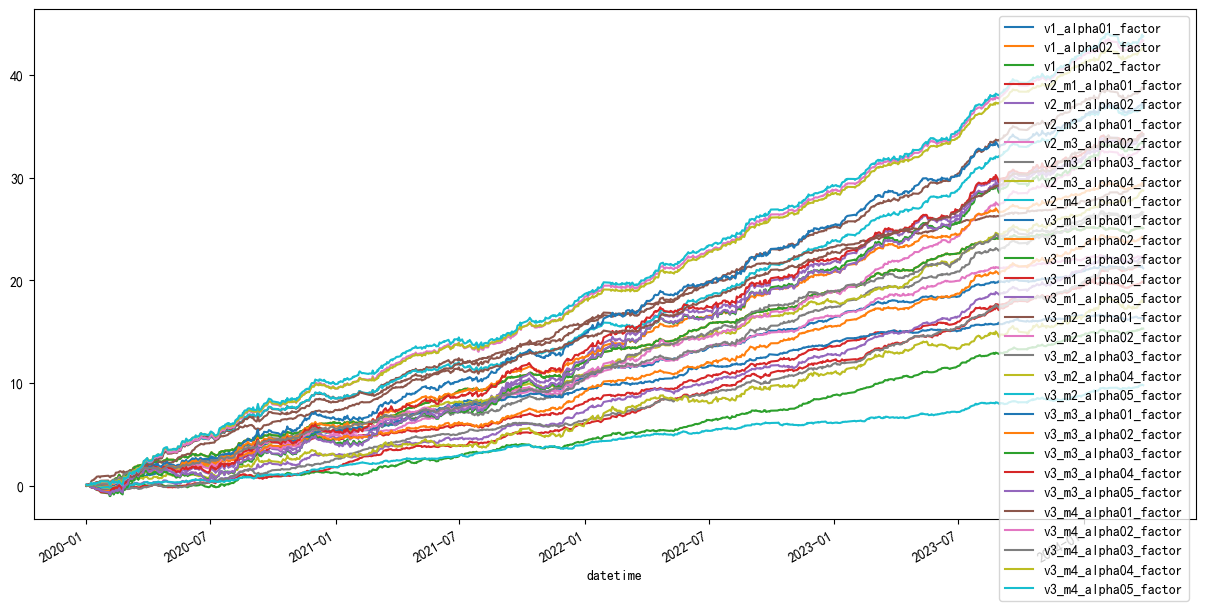

In [135]:
cumic(factor_names,ic_df)

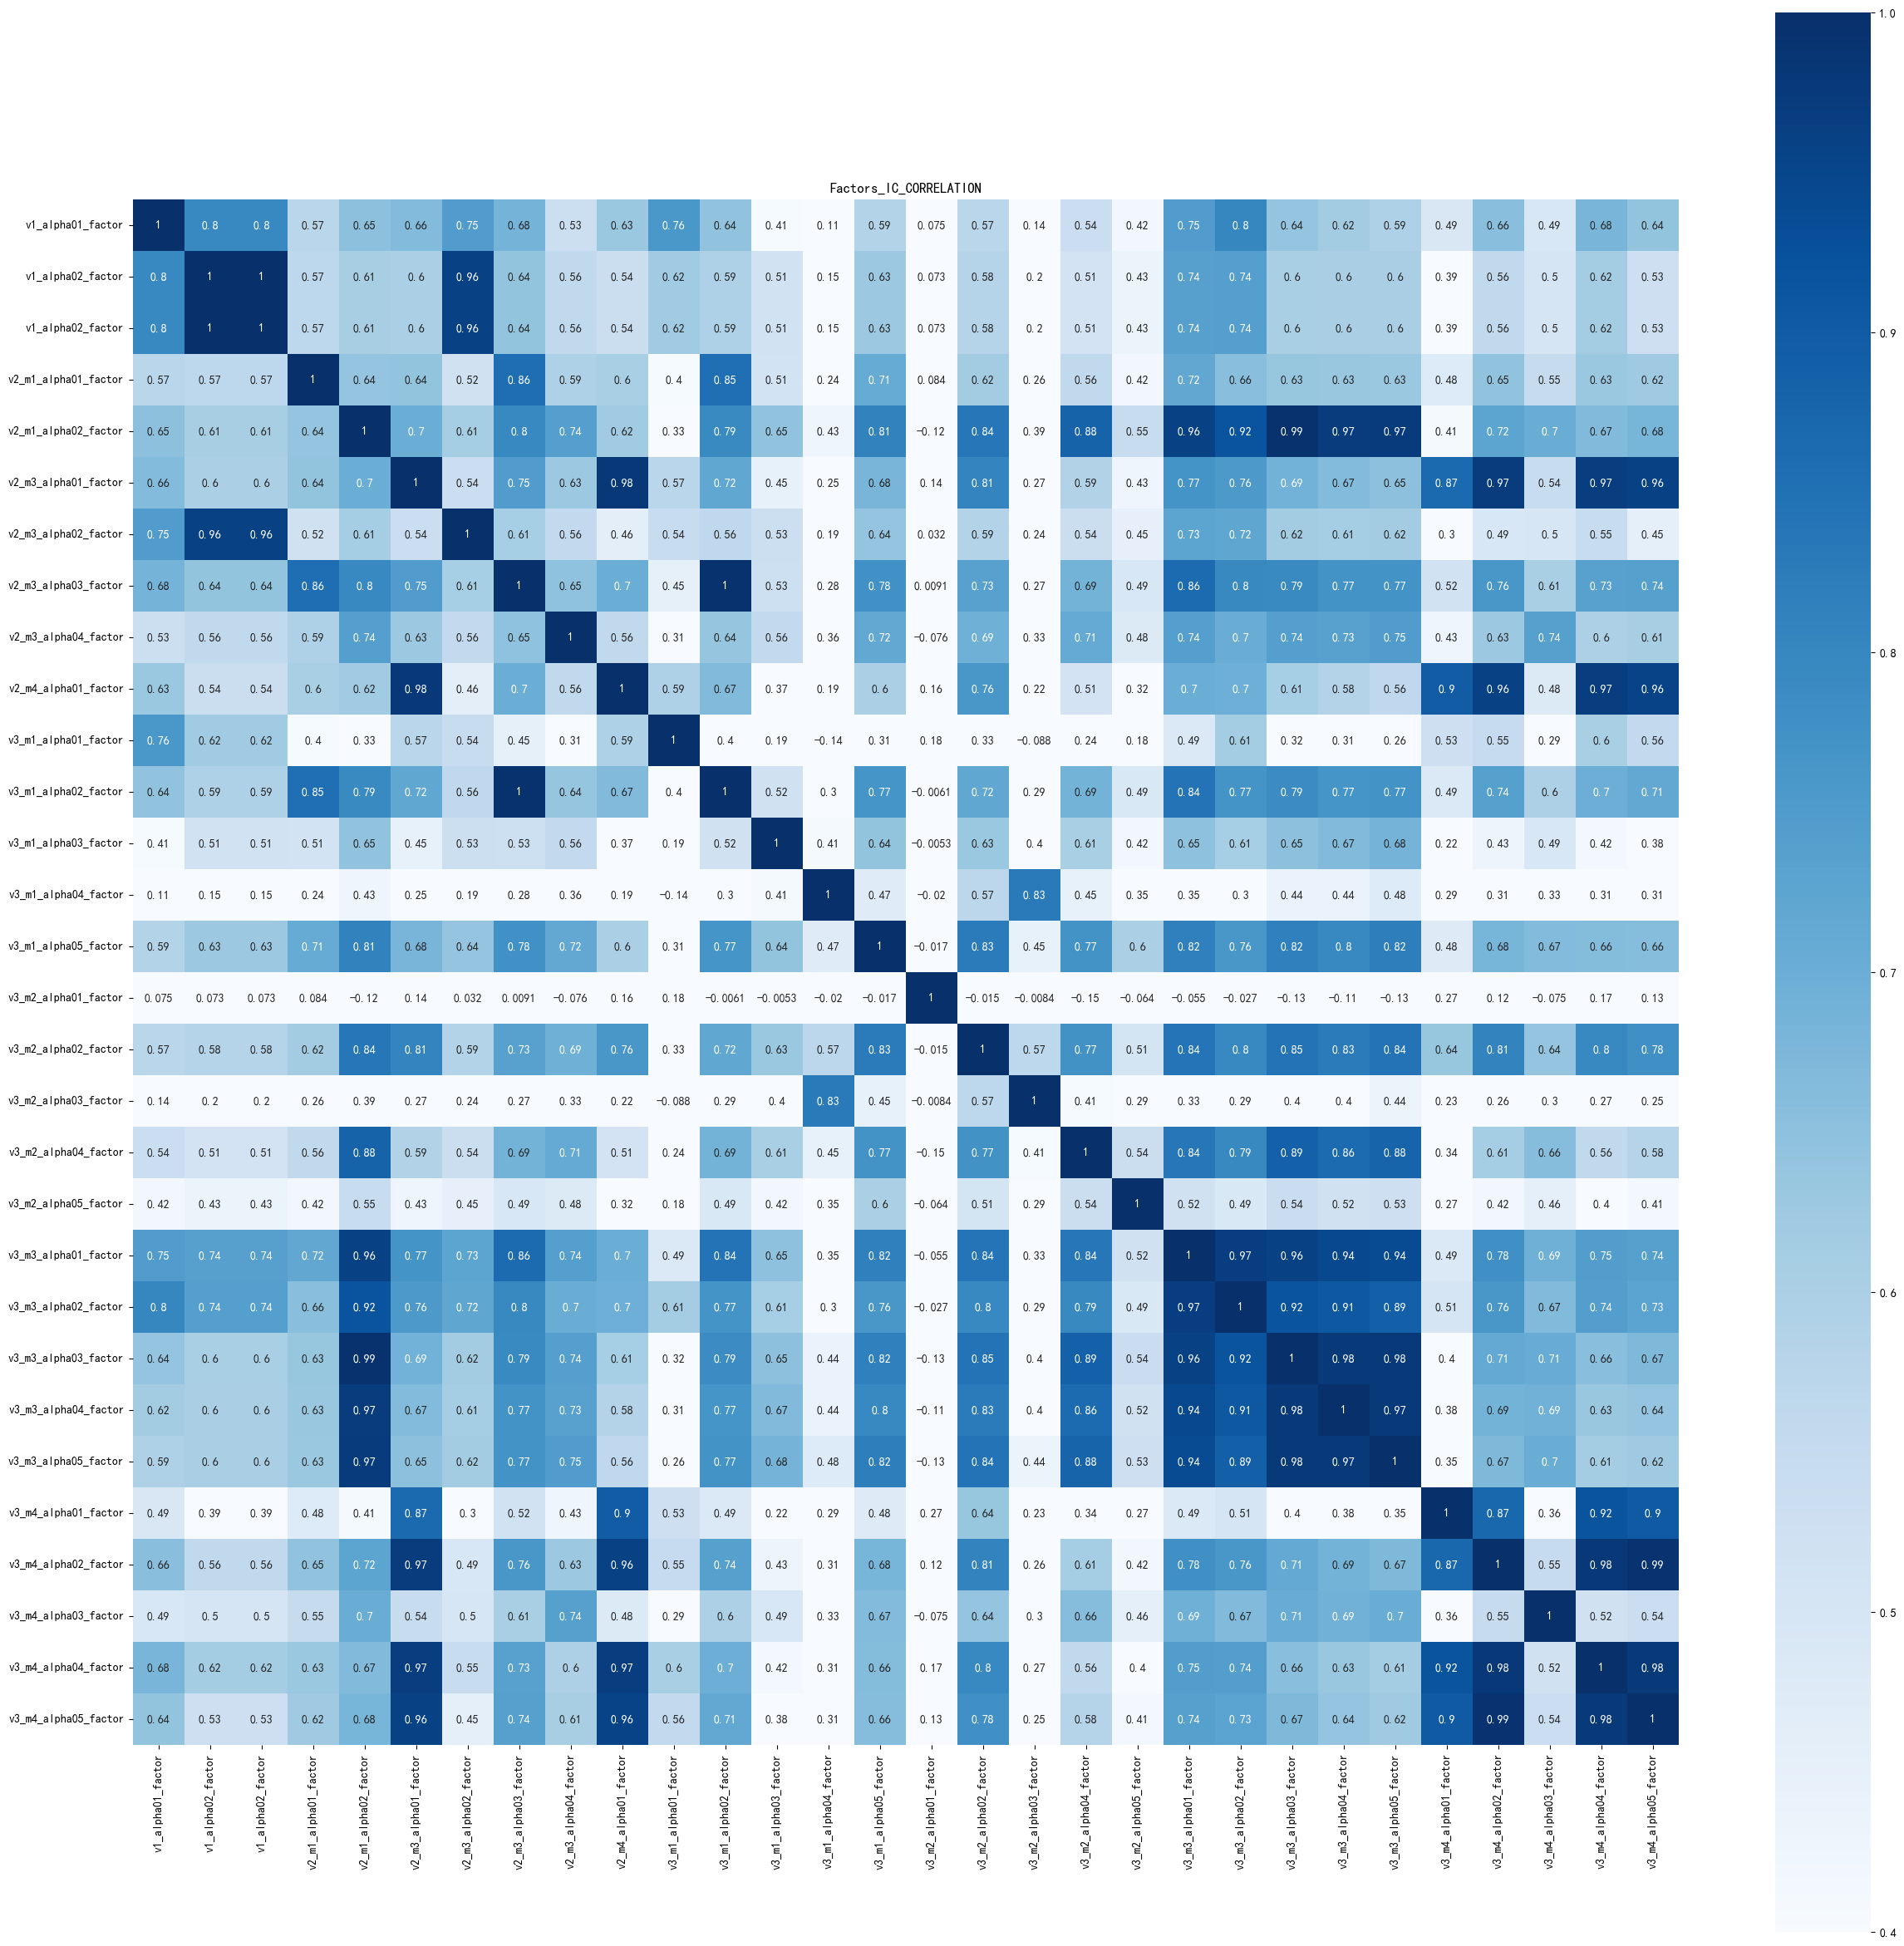

In [136]:
hot_corr(factor_names,ic_df)

In [169]:
factor_names = ic_summary[ic_summary.IR > 0.3].index.tolist()
ic_summary[ic_summary.IR > 0.3]

,IC mean,IC std,IR,IC>0,ABS_IC>2%,t_stat
name,,,,,,
v1_alpha02_factor,0.0244,0.0740,0.3302,0.6329,0.7975,10.5815
v1_alpha02_factor,0.0244,0.0740,0.3302,0.6329,0.7975,10.5815
v2_m3_alpha01_factor,0.0377,0.1043,0.3614,0.6368,0.8539,11.5821
v2_m3_alpha03_factor,0.0256,0.0850,0.3018,0.6086,0.8179,9.6720
v2_m3_alpha04_factor,0.0280,0.0839,0.3336,0.6280,0.8111,10.6906
v2_m4_alpha01_factor,0.0359,0.1044,0.3439,0.6280,0.8598,11.0219
v3_m1_alpha04_factor,0.0214,0.0635,0.3370,0.6261,0.7537,10.7988
v3_m2_alpha01_factor,0.0285,0.0573,0.4967,0.6972,0.7624,15.9166
v3_m2_alpha02_factor,0.0321,0.0997,0.3218,0.6173,0.8559,10.3120


In [170]:
factor_names_pass = corr_filter(factor_names,ic_df,0.6)

In [171]:
factor_names_pass

['v3_m2_alpha01_factor',
 'v3_m4_alpha04_factor',
 'v3_m2_alpha03_factor',
 'v2_m3_alpha04_factor']

In [172]:
gp_combo = pd.DataFrame()
for i in factor_names_pass:
    gp_combo = gp_combo.add(eval(i),fill_value=0)

gp_combo.to_pickle('./data/gp_combo.pkl')

In [173]:
ic,performance = Quick_Factor_Return_N_IC(gp_combo,1,index_item,'gp_combo')

{'name': 'gp_combo', 'IC mean': 0.0442, 'IC std': 0.1053, 'IR': 0.4199, 'IC>0': 0.6563, 'ABS_IC>2%': 0.8325, 't_stat': 13.4556}


100%|██████████| 52/52 [00:00<00:00, 178.08it/s]


{'策略累计收益': 0.4842,
 '策略年化收益': 0.1014,
 '基准累计收益': -0.003,
 '基准年化收益': -0.0007,
 '阿尔法': 0.0855,
 '贝塔': 0.6788,
 '波动率': 0.1896,
 '夏普比率': 0.3766,
 '下行波动率': 0.1463,
 '索提诺比率': 0.4884,
 '跟踪误差': 0.1159,
 '信息比率': 0.8812,
 '最大回撤': 0.2884,
 '卡玛比率': 0.3518,
 '超额累计收益': 0.4886,
 '超额年化收益': 0.1022,
 '超额波动率': 0.1197,
 '超额夏普': 0.6036,
 '超额最大回测': 0.1281,
 '胜率': 0.5267,
 '盈亏比': 1.0737}

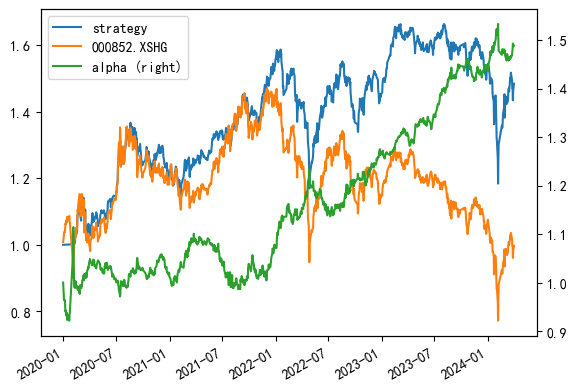

In [183]:
buy_list = get_buy_list(gp_combo,top_tpye='quantile',quantile_q=0.8)
df_weight = buy_list.div(buy_list.sum(axis = 1),axis = 0)
df_weight = df_weight.shift(1)
# 20日调仓
account_result = backtest(df_weight)
performance_cumnet,result = get_performance_analysis(account_result,index_item)
performance_cumnet.plot(secondary_y='alpha')
result

100%|██████████| 206/206 [00:01<00:00, 189.74it/s]


{'策略累计收益': 0.4486,
 '策略年化收益': 0.0949,
 '基准累计收益': -0.003,
 '基准年化收益': -0.0007,
 '阿尔法': 0.0786,
 '贝塔': 0.6888,
 '波动率': 0.1843,
 '夏普比率': 0.3522,
 '下行波动率': 0.1526,
 '索提诺比率': 0.4254,
 '跟踪误差': 0.1009,
 '信息比率': 0.9482,
 '最大回撤': 0.266,
 '卡玛比率': 0.3568,
 '超额累计收益': 0.4529,
 '超额年化收益': 0.0957,
 '超额波动率': 0.1015,
 '超额夏普': 0.6473,
 '超额最大回测': 0.1222,
 '胜率': 0.5112,
 '盈亏比': 1.1178}

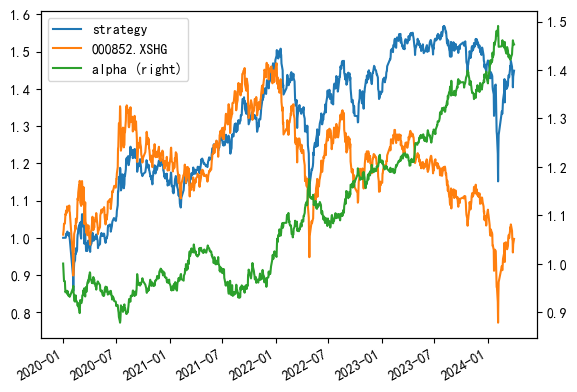

In [185]:
buy_list = get_buy_list(gp_combo,top_tpye='quantile',quantile_q=0.8)
df_weight = buy_list.div(buy_list.sum(axis = 1),axis = 0)
df_weight = df_weight.shift(1)
# 5日调仓
account_result = backtest(df_weight,change_n=5)
performance_cumnet,result = get_performance_analysis(account_result,index_item)
performance_cumnet.plot(secondary_y='alpha')
result

100%|██████████| 1028/1028 [00:05<00:00, 187.51it/s]


{'策略累计收益': 0.2476,
 '策略年化收益': 0.0556,
 '基准累计收益': -0.003,
 '基准年化收益': -0.0007,
 '阿尔法': 0.0368,
 '贝塔': 0.5704,
 '波动率': 0.1543,
 '夏普比率': 0.166,
 '下行波动率': 0.129,
 '索提诺比率': 0.1986,
 '跟踪误差': 0.1222,
 '信息比率': 0.4609,
 '最大回撤': 0.2036,
 '卡玛比率': 0.2731,
 '超额累计收益': 0.2513,
 '超额年化收益': 0.0564,
 '超额波动率': 0.1233,
 '超额夏普': 0.2141,
 '超额最大回测': 0.1849,
 '胜率': 0.4908,
 '盈亏比': 1.1267}

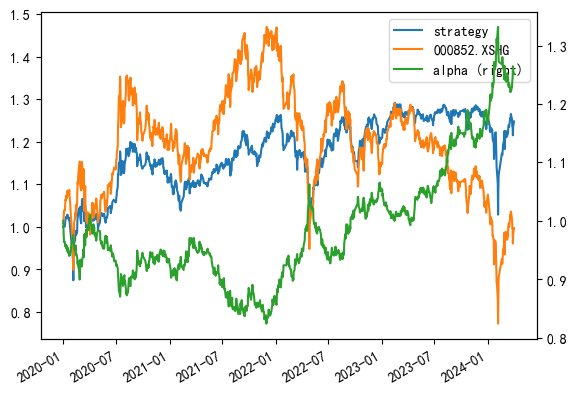

In [184]:
buy_list = get_buy_list(gp_combo,top_tpye='quantile',quantile_q=0.8)
df_weight = buy_list.div(buy_list.sum(axis = 1),axis = 0)
df_weight = df_weight.shift(1)
# 1日调仓
account_result = backtest(df_weight,change_n=1)
performance_cumnet,result = get_performance_analysis(account_result,index_item)
performance_cumnet.plot(secondary_y='alpha')
result